# T018 · Fully Automated Drug Design Pipeline

Authors:

- Armin Ariamajd, 2021, CADD seminar 2021, Charité/Freie Universität Berlin
- Melanie Vogel, 2021, CADD seminar 2021, Charité/Freie Universität Berlin
- Andrea Volkamer, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Dominique Sydow, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Corey Taylor, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)

## Aim of this talktorial

In this talktorial, we will learn how to develop an **automated structure-based virtual screening pipeline**. 
The pipeline is particularly suited for the hit expansion and lead optimization phases of a drug discovery project, where a promising ligand (i.e. an initial hit or lead compound) needs to be structurally modified in order to improve its binding affinity and selectivity for the target protein. The general architecture of the pipeline can thus be summarized as follows (*Figure 1*).

* **Input**
    * Target **protein structure** and a promising **ligand** (e.g. lead or hit compound), plus specifications of the processes that need to be performed.
* **Processes**
    1. Detection of the most druggable binding site for the given protein structure.
    2. Finding derivatives and structural analogs for the ligand. 
    3. Performing docking calculations on the selected binding site of those analogs.
    4. Analyzing and vizualizing predicted protein–ligand interactions and binding modes for each analog.
* **Output**
    * Protein-ligand structure(s) optimized for affinity and selectivity.

![Pipeline overview](images/fig1.png)

*Figure 1*: General architecture of the automated structure-based virtual screening pipeline.

### Contents in *Theory*

- [Drug design pipeline](#drug_design_theory)
- [Binding site detection](#binding_site_theory) 
- [Chemical similarity](#similarity_theory)
- [Molecular docking](#docking_theory)
- [Protein-ligand interactions](#interactions_theory)
- [Visual inspection of the docking results](#visual_theory)

### Contents in *Practical*

- [Outline of the virtual screening pipeline](#1_practical)
- [Reading the input data and initializing output paths](#2_practical)
- [Processing the input protein data](#3_practical)
- [Processing the input ligand data](#4_practical)
- [Binding site detection](#5_practical)
- [Ligand similarity search](#6_practical)
- [Molecular docking](#7_practical)
- [Analysis of protein–ligand interactions](#8_practical)
- [Selection of the best optimized ligand](#9_practical)
- [Putting the pieces together: A fully automated pipeline](#10_practical)

### References

Note due to the extensive references in each category, the details are hidden, unless you click on the section.

<details>

* TeachOpenCADD teaching platform
    1. Journal article on *TeachOpenCADD* teaching platform for computer-aided drug design: [D. Sydow *et al.*, *J. Cheminform.* **2019**, 11, 29.](https://doi.org/10.1186/s13321-019-0351-x)
    2. [*TeachOpenCADD* website](https://projects.volkamerlab.org/teachopencadd/index.html) at [Volkamer lab](https://volkamerlab.org/)
    2. This talktorial is inspired by the *TeachOpenCADD* Talktorials [T013 - T017](https://github.com/volkamerlab/teachopencadd/tree/t011-base/teachopencadd/talktorials)
* Drug design pipeline
    3. Book on drug design: [G. Klebe, *Drug Design*, Springer, *2013*.](https://doi.org/10.1007/978-3-642-17907-5)
    4. Review article on early stages of drug discovery: [Hughes *et al.*, Br. J. Pharmacol.* *2011*, 162, 1239-1249.](https://doi.org/10.1111/j.1476-5381.2010.01127.x)
    5. Review article on computational drug design: [Sliwoski *et al.*, *Pharmacol. Rev.* *2014*, 66, 334-395.](https://doi.org/10.1124/pr.112.007336)
    6. Review article on computational drug discovery: [Leelananda *et al.*, *Beilstein J. Org. Chem.* *2016*, 12, 2694-2718.](https://doi.org/10.3762/bjoc.12.267)
    7. Review article on free software for building a virtual screening pipeline: [Glaab, *Brief. Bioinform.* *2016*, 17, 352-366.](https://doi.org/10.1093/bib/bbv037)
    8. Review article on automating drug discovery: [Schneider, *Nat. Rev. Drug Discov.* *2018*, 17, 97-113.](https://doi.org/10.1038/nrd.2017.232)
    9. Review article on structure-based drug discovery: [Batool *et al.*, *Int. J. Mol. Sci.* *2019*, 20, 2783.](https://doi.org/10.3390/ijms20112783)
* Binding site detection and the *DoGSiteScorer* program
    10. Book chapter on prediction and analysis of binding sites: [Volkamer *et al.*, *Applied Chemoinformatics*, Wiley, *2018*, pp. 283-311.](https://doi.org/10.1002/9783527806539.ch6g)
    11. Journal article on binding-site and druggability predictions using *DoGSiteScorer*: [Volkamer *et al.*, *J. Chem. Inf. Model.* *2012*, *52*, 360-372.](https://doi.org/10.1021/ci200454v)
    12. Journal article describing the *ProteinsPlus* web-portal: [R. Fahrrolfes *et al.*, *Nucleic Acids Res.* *2017*, 45, W337-W343.](https://doi.org/10.1093/nar/gkx333)
    13. [*ProteinsPlus* website](https://proteins.plus/), and information regarding the usage of its *DoGSiteScorer* [REST-API](https://proteins.plus/help/dogsite_rest)
    14. *TeachOpenCADD* Talktorial on binding-site detection: [Talktorial T014](https://github.com/volkamerlab/teachopencadd/tree/t011-base/teachopencadd/talktorials/T014_binding_site_detection)
    15. *TeachOpenCADD* talktorial on querying online API web-services: [Talktorial T011](https://github.com/volkamerlab/teachopencadd/tree/t011-base/teachopencadd/talktorials/T011_query_online_api_webservices)
* Chemical similarity and the *PubChem* online database
    16. Review article on molecular similarity in medicinal chemistry: [G. Maggiora *et al.*, *J. Med. Chem.* *2014*, 57, 3186-3204.](https://doi.org/10.1021/jm401411z)
    17. Journal article on extended-connectivity fingerprints: [D. Rogers *et al.*, *J. Chem. Inf. Model.* *2010*, 50, 742-754.](https://doi.org/10.1021/ci100050t)
    18. Journal article describing the latest developments of the *PubChem* web-services: [S. Kim *et al.*, *Nucleic Acids Res.* *2019*, 47, D1102-D1109.](https://doi.org/10.1093/nar/gky1033)
    19. [*PubChem* website](https://pubchem.ncbi.nlm.nih.gov/), and information regarding the usage of its [APIs](https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access)
    20. Description of *PubChem*'s [custom substructure fingerprint](https://ftp.ncbi.nlm.nih.gov/pubchem/specifications/pubchem_fingerprints.pdf) and [*Tanimoto* similarity measure](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-016-0163-1) used in its similarity search engine.  
    20. *TeachOpenCADD* talktorial on compound similarity: [Talktorial T004](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T004_compound_similarity/talktorial.ipynb)
    21. *TeachOpenCADD* talktorial on data acquisition from PubChem: [Talktorial T013](https://github.com/volkamerlab/teachopencadd/blob/t011-base/teachopencadd/talktorials/T013_query_pubchem/talktorial.ipynb) 
* Molecular docking and the *Smina* program
    22. Review article on molecular docking algorithms: [X. Y. Meng *et al.*, *Curr. Comput. Aided Drug Des.* *2011*, 7, 146-157.](https://doi.org/10.2174/157340911795677602)
    23. Review article on different software used for molecular docking: [N. S. Pagadala *et al.*, *Biophys. Rev.* *2017*, 9, 91-102.](https://doi.org/10.1007/s12551-016-0247-1)
    24. Review article on evaluation and comparison of different docking algorithms: [G. L. Warren * et al.*, *J. Med. Chem.* *2006*, 49, 5912-5931.](https://doi.org/10.1021/jm050362n)
    25. Review article on evaluation of ten docking programs on a diverse set of protein-ligand complexes: [Z. Wang * et al.*, Phys. Chem. Chem. Phys.* *2016*, 18, 12964-12975.](https://doi.org/10.1039/C6CP01555G)
    26. Journal article describing the Smina docking program and its scoring function: [D. R. Koes *et al.*, *J. Chem. Inf. Model.* *2013*, 53, 1893-1904.](https://doi.org/10.1021/ci300604z) 
    27. [*OpenBabel* documentation](http://openbabel.org/wiki/Main_Page)
    28. [*Smina* documentation](https://sourceforge.net/projects/smina/)
    28. *TeachOpenCADD* talktorial on protein–ligand docking: [Talktorial T015](https://github.com/volkamerlab/teachopencadd/blob/t011-base/teachopencadd/talktorials/T015_protein_ligand_docking/talktorial.ipynb)
* Protein-ligand interactions and the *PLIP* program
    29. Review article on protein-ligand interactions: [X. Du *et al.*, *Int. J. Mol. Sci.* *2016*, 17, 144.](https://doi.org/10.3390/ijms17020144)
    30. Journal article analyzing the types and frequencies of different protein-ligand interactions in available protein-ligand complex structures: [R. Ferreira de Freitas * et al.*, *Med. Chem. Commun.* *2017*, 8, 1970-1981.](https://doi.org/10.1039/C7MD00381A)
    31. Journal article describing the *PLIP* algorithm: [S. Salentin *et al.*, *Nucleic Acids Res.* *2015*, 43, W443-447.](https://doi.org/10.1093/nar/gkv315)
    32. [*PLIP* website](https://plip-tool.biotec.tu-dresden.de/plip-web/plip/index)
    34. [*PLIP* documentation](https://github.com/pharmai/plip)
    33. *TeachOpenCADD* talktorial on protein-ligand interactions: [Talktorial T016](https://github.com/volkamerlab/teachopencadd/blob/t011-base/teachopencadd/talktorials/T016_protein_ligand_interactions/talktorial.ipynb)
* Visual inspection of docking results and the *NGLView* program
    34. Journal article describing the NGLView program: [H. Nguyen *et al.*, *Bioinformatics* *2018*, 34, 1241-1242.](https://doi.org/10.1093/bioinformatics/btx789)
    35. [*NGLView* documentation](http://nglviewer.org/nglview/latest/api.html)
    36. *TeachOpenCADD* talktorial on advanced NGLView usage: [Talktorial T017](https://github.com/volkamerlab/teachopencadd/blob/t011-base/teachopencadd/talktorials/T017_advanced_nglview_usage/talktorial.ipynb)
</details>

<a id='theory'></a>
# Theory

<a id='drug_design_theory'></a>
## Drug design pipeline

Modern drug discovery and development is a time and resource-intensive process comprised of several phases (Figure 2). The process from initial hit to the pre-clinical phase can take approximately two to four years and cost hundreds of millions of dollars. Causes for failure in the pre-clinical and clinical phases include compound ineffectiveness or unpredictable side-effects. 
Thus, computer-aided drug design pipelines can help to accelerate drug discovery projects, e.g. by prioritizing compounds.

![Drug design pipeline](images/fig2.png)

*Figure 2*: Schematic representation of the main phases in a modern drug discovery pipeline.

In this talktorial, we will focus on the **hit-to-lead** and **lead optimization** phases of the pipeline: The goal is to find analogs with improved binding affinities, selectivities, physiochemical and/or pharmacokinetic properties. 

<details>
Given a target protein structure and a hit or lead compound, instead of synthesizing a variety of analogs and testing their potency in laboratory screening experiments, we will obtain these analogs via a similarity-search algorithm. We can then calculate their physiochemical properties and select the best analogs in order to perform docking calculations. The result of these calculations is an estimation of the affinity for each compound against the target protein. Analogs with the highest calculated binding affinities will be selected and we visualize their predicted binding modes to choose those compounds that exhibit optimal protein-ligand interactions. This will hopefully result in enhanced selectivities for the target protein as well.
</details>

<a id='binding_site_theory'></a>
## Binding site detection 

Binding sites, also known as binding pockets, are cavities in the 3-dimensional structure of a protein (Figure 3). These are mostly found on the molecular surface of the protein structure, and are the main regions through which the protein interacts with other entities. For a favorable interaction, the two binding partners need to have complementary steric and electronic properties (cf. lock-and-key principle, induced-fit model). Therefore, attractive intermolecular interactions between the residues of the binding pocket and, for example, a small molecule ligand is one of the key factors for molecular recognition, and thus, a ligand's potency.   

Detailed knowledge of the target protein's binding sites is of utmost importance in a drug discovery pipeline. 

<details>
Ligands predicted to interact most favorably with a specific binding site of the protein can be designed that lead to a desired modulation of the protein's behavior, whether the goal is inhibition or stimulation of the protein's function. Thus, the binding site of interest needs to be known - especially also to perform docking studies. This is not a problem when a crystal structure of the target protein is available, where a ligand has usually been co-crystallized with the protein in the desired binding site. In that case, the residues surrounding the co-crystallized ligand can be simply used to define the binding pocket. However, when the available protein structure does not contain a co-crystallized ligand in the desired binding pocket, it is essential for the docking calculations to first detect and define a druggable pocket in the protein. 
    
![Binding site detection](images/fig3.png)

*Figure 3*: Crystal structure of a protein (EGFR; PDB-code: 3W32) with a co-crystallized ligand in its main (orthosteric) binding site. The protein's surface is shown in gray. The binding site is colored blue. The ligand's carbon atoms are colored green. The image was created using **PyMol**.
    
</details>

### Binding site detection with *DoGSiteScorer*

For binding site detection, we will use the _DoGSiteScorer_ functionality of the **<a href="https://proteins.plus/">ProteinsPlus</a>** webserver. _DoGSiteScorer_ uses a **geometry- and grid-based detection** algorithm where the protein is embedded into a Cartesian 3D-grid and each grid point is labeled as either free or occupied depending on whether it lies within the van-der-Waals radius of any protein atoms. Subsequently, an edge-detection algorithm from image processing, called **Difference of Gaussians** (DoG), is used to identify protrusions on the protein surface. In doing so, cavities on the protein surface that can accommodate a spherical object are identified per grid point. Finally, cavities on neighboring grid-points are clustered together based on specific cut-off criteria, resulting in defined sub-pockets that are merged into pockets (Figure 4). 

<details>
For each (sub-)pocket, the algorithm then calculates several descriptors, e.g. volume, surface area, depth, hydrophobicity, number of hydrogen-bond donors/acceptors and amino acid count. _DoGSiteScorer_ also calculates two druggability estimates for each (sub-)pocket: 

1. a _simple druggability score_, based on a linear combination of the three descriptors describing volume, hydrophobicity and enclosure.
2. another score is calculated by incorporating a subset of meaningful descriptors into a support vector machine (SVM) model, trained and tested on the freely available (non-redundant) druggability dataset consisting of 1069 targets.
    
Both calculated druggability scores are between 0 and 1, where a higher score corresponds to a more druggable binding site. Using these calculated descriptors and druggability estimates, we can then choose the most suitable pocket depending on the specifics of the project in hand.

</details>

![Binding site detection with DoGSiteScorer](images/fig4.png)

*Figure 4*: Visualization of some of the sub-pockets (colored meshed volumes) for the EGFR protein (PDB-code: 3W32) as detected by the *DoGSiteScorer* web-service. The co-crystallized ligand is mostly contained in the purple sub-pocket.

For more details see [talktorial T014](https://github.com/volkamerlab/teachopencadd/tree/t011-base/teachopencadd/talktorials/T014_binding_site_detection) on binding-site detection.

<a id='similarity_theory'></a>
## Chemical similarity

In the hit expansion and lead optimization steps of an experimental drug design pipeline, several derivatives of the initial hit/lead compound are chemically synthesized. 
Following the similarity hypothesis, analogues can also be computationally obtained by performing a **similarity search** on databases of existing chemical compounds. 

Thus, a numerical description of compounds is needed as well as a similarity measure to compare them. One common example are molecular fingerprint descriptors together with Tanimoto similarities. 

<details>
    
The simplest descriptors for a molecule are the so-called **1D-descriptors**, which are scalar values corresponding to a certain property of the molecule.
Some examples include: Molecular weight, octanol-water partition coefficient (logP) or total polar surface area (TPSA).

However, these descriptors usually do not contain enough information to assess the structural and chemical similarity of two compounds. For this purpose, **2D-descriptors**, also known as **molecular fingerprints**, are used. These descriptors are vectors that can represent a specific molecular structure in much more detail using a set of scalars. 

A variety of algorithms are available for generation of 2D-descriptors from chemical structures, e.g. ***MACCS*** **structural keys** and ***ECFP/Morgan*** **fingerprints**. Generally, these algorithms work by extracting a set of specific features from the structure (Figure 5), generating a numerical representation for each feature, and using these representations to produce either a bit-vector where each component is a bit defining the presence/absence of a particular feature (i.e. Morgan fingerprints), or a count-vector where each value corresponds to the number of times a specific feature is present in the structure (i.e. MACCS keys). 
    
Moreover, there are other scoring functions to calculate the similarity between two molecules based on their 2D-descriptors. These include ***Euclidean***-**distance** and ***Manhattan***-**distance** calculations, where both presence and absence of attributes are considered, or ***Tanimoto*** and ***Dice*** coefficients, which only consider the presence of attributes. It should be noted that there is no single correct approach to calculate molecular similarity. and depending on the purpose of the project different descriptors and metrics may be used, which can generally result in vastly different similarity scores.    
</details>

![Chemical similarity](images/fig5.png)

*Figure 5*: A simplified depiction of the process of calculating the similarity between two compounds. First, the structure of each compound is encoded into a molecular fingerprint bit-vector, where each bit corresponds to the presence or absence of a particular fragment in the structure, for example. These fingerprints can then be compared using different similarity metrics in order to calculate a similarity score.

For more details on compound similarity, see [talktorial T004](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T004_compound_similarity/talktorial.ipynb).

### PubChem database
In this talktorial, we will use the **<a href="https://pubchem.ncbi.nlm.nih.gov/">PubChem</a>** web-services for performing the similarity search on the input ligand. *PubChem*, which is maintained by the <a href="https://www.ncbi.nlm.nih.gov/">U.S. National Center for Biotechnology Information (NCBI)</a> contains an open database with 110 million chemical compounds and their properties (e.g. identifiers, physiochemical properties, biological activities etc.), which can be accessed through both a web-based interface, and several different web-service Application Programming Interfaces (***API***s). 

Here, we will use their <a href="https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access">PUG-REST API</a>. It also allows for directly performing similarity searches on the database, using a <a href="https://ftp.ncbi.nlm.nih.gov/pubchem/specifications/pubchem_fingerprints.pdf">custom substructure fingerprint</a> as the 2D-descriptor, and the <a href="https://jcheminf.biomedcentral.com/articles/10.1186/s13321-016-0163-1">*Tanimoto* similarity measure</a> as the metric. Therefore, by submitting a compound's identifier (e.g. SMILES, CID, InChI etc.) to the *PubChem*'s API, providing a similarity threshold and the desired number of maximum results, a certain number of compounds within the given similarity threshold can be obtained.

For more details on data acquisition from PubChem, see [talktorial T013](https://github.com/volkamerlab/teachopencadd/blob/t011-base/teachopencadd/talktorials/T013_query_pubchem/talktorial.ipynb).

<a id='docking_theory'></a>
## Molecular docking

After defining an appropriate binding site in the target protein and obtaining a set of analogs for the ligand of interest, the next step is to assess the suitability of each analog in terms of its position in the binding site, otherwise known as the binding mode, and its estimated fit or binding affinity. This can be done using a molecular docking algorithm. 

The process works by **sampling the ligand's conformational space** in the protein's binding site and evaluating the energetics of protein-ligand interactions for each generated conformation using a **scoring function**. The **binding affinity** of each docking pose is then estimated to determine the energetically most-favorable **binding modes**. 

<details> 
Most docking programs require some preparation steps of the protein and ligand structures. For example: 

- Hydrogen atoms that are usually absent in crystal structures should be added to the protein. 
- The correct protonation state for each atom should be calculated based on a given pH value, usually physiological pH (7.4). 
- Partial charges should be assigned to all atoms. 
- For ligands, which are usually inputted via text-based representation (e.g. SMILES), a low-energy conformer should also be generated. It is then used as the starting point in the conformational sampling process. 

However, most of these calculations have limitations on their accuracy. Many are either computationally expensive, such as is the case where the lowest-energy conformation of the ligand is calculated, or require information that is not available beforehand or ambiguous, such as protonation states for the protein and ligand. In many cases, the docking pose with the highest estimated binding affinity does not correspond to the experimentally determined binding mode of the ligand (Figure 6). These limitations, along with others inherent in all force-field based methods do affect the accuracy of the estimates from docking results. 
</details>

![Example docking poses](images/fig6.png)

*Figure 6*: An example of two generated docking poses (red) in a re-docking experiment performed using the *Smina* program, superimposed over the corresponding protein structure (EGFR; PDB-code: 3W32) and the co-crystallized ligand in its native binding mode (green). While the generated docking pose shown on the left is calculated to have a higher binding affinity, it also displays a higher distance-RMSD to the native docking pose. The image was created using *PyMol*.

For more details on protein–ligand docking, see [talktorial T015](https://github.com/volkamerlab/teachopencadd/blob/t011-base/teachopencadd/talktorials/T015_protein_ligand_docking/talktorial.ipynb).

In this talktorial, we will use the **<a href="https://sourceforge.net/projects/smina/">Smina</a>** docking program, which is an open-source fork of the docking program **<a href="http://vina.scripps.edu/">Autodock Vina</a>**. *Smina* is open-source software and has a focus on improved scoring functions and energetic minimization. It uses a custom empirical scoring function as default but also supports user-parameterized scoring functions as well. In addition, in order to prepare the protein and ligand structures for the docking experiment (as described above), we will also use the **<a href="https://github.com/pybel/pybel">Pybel</a>** package - a *Python* package for the **<a href="http://openbabel.org/wiki/Main_Page">OpenBabel</a>** program.

<a id='interactions_theory'></a>
## Protein–ligand interactions

The number and type of non-covalent intermolecular interactions between the protein and the ligand are determining factors of the ligand's potency. The overall affinity of a ligand is an intricate balance of several types of interactions which are mostly governed by steric and electronic properties of the interacting partners.

<details>
    
Interactions (see also Figure 7)
- Hydrophobic interactions
- Hydrogen bonding (direct or water-bridged)
- Metal complexation
- Electrostatic interactions
- $\pi$–$\pi$- and cation–$\pi$ interactions
- Halogen bonds

![Intramolecular interactions](images/fig7.gif)

*Figure 7*: Most common non-covalent intramolecular interactions in available protein-ligand complexes in the *Protein Data Bank* (PDB), and their frequency distribution. Reprinted from reference [<a href="https://doi.org/10.1039/C7MD00381A">30</a>].
    
</details>

While the most common of these interactions are estimated by the scoring function of the docking algorithm, it is useful to explicitly analyze them in the binding modes generated by the docking calculation. This information can be used to validate the calculated binding poses or to narrow the choice of an optimal lead compound in terms of selectivity, e.g. by choosing those derivatives that exhibit interactions with specific mutated or non-conserved residues in the protein. 

In this talktorial, we will use the **<a href="https://plip-tool.biotec.tu-dresden.de/plip-web/plip/index">Protein–Ligand Interaction Profiler (PLIP)</a>**, an open-source program with both a webserver and an available package for *Python*. *PLIP* can analyze protein-ligand interactions in any given protein-ligand complex structure by selecting pairs of atoms - one from the protein and one from the ligand - that lie within a pre-defined distance cut-off value. It then identifies the potential interactions between selected pairs based on electronic and geometric considerations. 

Thus, a set of information is outputted for each detected interactions including the interaction type, the atoms involved in each of the ligand and protein and other properties specific to each interaction type. The results can then be used to visualize the protein-ligand interactions (Figure 8) or to analyze them algorithmically.

![Protein-ligand interactions in 3D](images/fig8.png)  
 
*Figure 8*: Visualization of the protein-ligand interactions in a protein-ligand complex structure (EGFR; PDB-code: 3W32) detected by the *PLIP* web-service. From the protein, only the interacting residues are shown with their protein and ligand carbon atoms colored blue and brown, respectively. Hydrophobic interactions are shown as gray dashed lines. Hydrogen bonds are depicted as blue lines. $\pi$-stacking interactions are shown as green dashed lines. Halogen bonds are displayed using cyan lines.

For more details on protein-ligand interactions, see [talktorial T016](https://github.com/volkamerlab/teachopencadd/blob/t011-base/teachopencadd/talktorials/T016_protein_ligand_interactions/talktorial.ipynb).

<a id='visual_theory'></a>
## Visual inspection of the docking results

Visual inspection of the calculated docking poses and their corresponding protein-ligand interactions is inevitable. Some of the most common considerations when selecting a binding mode ares:

- Similarity to experimentally observed binding modes in available crystal structures of the target protein
- Steric and electronic complementarity
- Polar functional groups in the ligand have an interaction partner in the protein
- No solvent-exposed hydrophobic moieties in the ligand
- Assessment of the displacement of or interactions with water molecules in the pocket
- Steric strain induced by the ligand binding

However, since manual inspection is a time-consuming process, it can only be performed on a small subset of calculated docking poses. These are usually the poses with the highest calculated binding affinities. To visualize the results, we use ***NGLView***, a *Jupyter* widget using a *Python* wrapper for the *Javascript*-based *NGL* library. This allows for visualization of structures within a *Jupyter* notebook in an interactive 3D view.

For more details on advanced NGLView usage, see [talktorial T017](https://github.com/volkamerlab/teachopencadd/blob/t011-base/teachopencadd/talktorials/T017_advanced_nglview_usage/talktorial.ipynb).

<a id='practical'></a>
# Practical

In this section, we will implement and demonstrate the automated structure-based virtual screening pipeline step by step.

First of all, we import all the dependencies that we are going to need for the development of the pipeline:

In [1]:
# Standard library:
import gzip  # for decompressing .gz files downloaded from DoGSiteScorer
from enum import Enum  # for creating enumeration classes
import io  # for creating file-like objects from strings of data (needed as input for some functions)
import logging  # for setting the logging level of some packages (i.e. to disable excessive logging default to some packages e.g. PLIP)
from pathlib import Path  # for creating folders and handling local paths
import subprocess  # for creating shell processes (needed to communicate with Smina program)
import time  # for creating pauses during the runtime (to wait for the response of API requests)
from urllib.parse import quote  # for url quoting

# 3rd-party packages:
from biopandas.pdb import PandasPdb  # for working with PDB files
from IPython.display import (
    Markdown,
    Image,
)  # for more display options in the Jupyter Notebook
from ipywidgets import (
    AppLayout,
    Layout,
    Select,
    Button,
)  # for interactive outputs in the Jupyter Notebook
import matplotlib as mpl  # for changing the display settings of plots (see bottom of the cell: Settings)
from matplotlib import (
    colors,
)  # for plotting color-maps (for visualization of protein-ligand interactions)
import matplotlib.pyplot as plt  # for plotting of data
import nglview as nv  # for visualization of the protein and protein-related data (e.g. binding sites, docking poses)
import numpy as np  # for some more functionalities when using Pandas (e.g. for handling NaN values)
from openbabel import (
    pybel,
)  # for preparing protein and ligand for docking, and other manipulations of PDB files
import pandas as pd  # for creating dataframes and handling data
import plip  # for changing the logging setting of the package (see bottom of the cell: Settings)
from plip.structure.preparation import (
    PDBComplex,
)  # for calculating protein-ligand interactions
from plip.exchange.report import (
    BindingSiteReport,
)  # for calculating protein-ligand interactions
import pypdb  # for communicating with the RCSB Protein Data Bank (PDB) to fetch PDB files
from rdkit import (
    Chem,
)  # for handling ligand data and calculating ligand-related properties
from rdkit.Chem import Draw, AllChem, Descriptors, PandasTools, rdFMCS
import requests  # for communicating with web-service APIs

# In-house packages:
from opencadd.structure.core import Structure  # for manipulating PDB files

# Settings:
logging.getLogger(plip.__name__).setLevel(
    logging.WARNING
)  # disabling excessive INFO logs of the PLIP package
mpl.rcParams["figure.dpi"] = 300  # for plots with higher resolution
mpl.rcParams["agg.path.chunksize"] = 10000  # for handling plots with large number of data points
pd.set_option("display.max_columns", 100)  # showing 100 columns at most
pd.set_option("display.max_colwidth", 200)  # increasing the maximum column width
pd.set_option("display.width", None)  # showing each row in a single line

<a id='1_practical'></a>
## Outline of the virtual screening pipeline

As this is a relatively large project with several different functionalities, it is a good practice to use **classes**. Classes can contain **methods** or even other classes (sub-classes) and are very useful for organizing a project by form and function. In doing so, the code will be well-structured and easier to follow, maintain, reuse and expand upon. 

We are going to use classes and organize them into a processing sequence analogous to a pipeline. When a class or method performs an operation on a piece of data, a new representation of that data is created. This is known as an **object** and the process of creating it is known as **instantiation**.  

An object is a versatile representation as it can contain data or instructions, known as as **attributes**. The object will be passed between points in the pipeline for further use or processing depending on what type of object it is or which class or method created it. Objects can be augmented with additional attributes or abilities and are even used to create new objects, gaining all of or a sub-set of its abilities (**inheritance**). This is as opposed to older languages where once data was read in by a program, it could not be altered and instructions for manipulating data were generally run in strict sequence. Objects can also be reused whereas, in older languages, once the data is processed, if it was not saved to disk, it was discarded. This is the essence of all **Object-Oriented Programming (OOP)** languages, which Python is.

The eight main classes we will use are described in Figure 9.

![Main classes](images/fig9.png)

*Figure 9*: Main classes used in the pipeline of this talktorial.

Although it is not necessary that the main classes be created in a specific order, you will see as we go that we can often reuse the functionality from one created class in another. Thus, a natural order forms (***Specs*** followed by ***Protein*** followed by ***Ligand***, etc.). As we progress, several 'helper' classes (e.g. ***IO***, ***PDB***, ***PubChem***, etc.) will also be instantiated. These contain functionality to assist in the operations of our main classes, such as retrieving data or constructing the software needed to perform a task. The purpose of these classes as well as which code is reused and when will be explained as the talktorial progresses.

As the code behind each class contains dozens of lines, we will not present all of it in this notebook directly. These classes are stored in a separate file (***utils.py***) and will be imported and used as necessary. Feel free to peruse that file if you would like to know more about the exact operations that are being done when the code is executed. It bears pointing out that one is not limited to the methods implemented for this talktorial. One of the key advantages of writing a pipeline in this manner is that one can add more functionality yourself.

Example demonstrations of each helper function are placed in the <a href="#io_demo">corresponding section</a> in *Supplementary Information*.

As a first step we will first define a container class ***LeadOptimizationPipeline*** with only a single instance attribute called ***name***. For the rest of the talktorial we will use the other classes mentioned, instantiate them with the necessary input data, and assign that instance to our created project. 

### Creating a new project: Instantiating the ***LeadOptimizationPipeline*** class 

We can now create an instance of the ***LeadOptimizationPipeline*** class, which we will call ***project1***. For demonstration purposes, we have chosen the same protein and ligand illustrated in *Figure 1*, i.e. the epidermal growth factor receptor (EGFR) as our target protein, and the ligand with the ChEMBL-ID CHEMBL328216. Thus, we will simply name our lead optimization project **Project1_EGFR_CHEMBL328216**:

In [2]:
class LeadOptimizationPipeline:
    def __init__(self, project_name):
        self.name = project_name

project1 = LeadOptimizationPipeline(project_name="Project1_EGFR_CHEMBL328216")

The instance-attribute ***name*** can then be accessed as follows:

In [3]:
project1.name

# NBVAL_CHECK_OUTPUT

'Project1_EGFR_CHEMBL328216'

<a id='2_practical'></a>

## Reading the Input Data and Initializing Output Paths

The first thing the pipeline should be able to do is to read and process the input data for the protein and the ligand as well as specifications for the processes that need to be performed on them. As this involves many parameters, it is best to use a file to store all the necessary input data for a specific project. For each project, the user only has to fill in a template input file with all the necessary data and then specify the filepath of the input data when running the program. 

Here, we use a CSV file, which is stored in the folder ***data***, under the name ***InputData_Template***. For demonstration purposes, we can open the empty template file here to have a closer look:

In [4]:
import pandas as pd  # for creating dataframes and handling data

pd.read_csv("data/InputData_Template.csv")

# NBVAL_CHECK_OUTPUT

,Subject,Property,Value,Description
0,Protein,Input Type*,NaN,"Allowed: 'pdb_code', 'pdb_filepath'."
1,Protein,Input Value*,NaN,Either a valid PDB-code or a local filepath to a PDB-file
2,Ligand,Input Type*,NaN,"Allowed: 'smiles', 'cid', 'inchi', 'inchikey', 'iupac_name', 'name' (Note that 'name' and 'iupac_name' identifiers do not work for all compounds)."
3,Ligand,Input Value*,NaN,"Identifier value corresponding to given input type, e.g. SMILES or CID number."
4,Binding Site,Definition Method,NaN,"Definition method for the protein binding site. Allowed: 'coordinates', 'ligand', 'detection'. Default: detection"
5,Binding Site,Coordinates,NaN,"If Definition Method is 'coordinates', enter the coordinates here. The coordinates should be entered as six numbers separated by spaces in the following order: center_x center_y center_z size_x si..."
6,Binding Site,Ligand,NaN,"If the Definition Method is 'ligand', enter the ligand-ID (as specified in the PDB file) here."
7,Binding Site,Detection Method,NaN,"If the Definition Method is 'detection', enter the detection method here. Allowed: 'dogsitescorer'. Default: dogsitescorer"
8,Binding Site,Protein Chain-ID,NaN,"If the Definition Method is 'detection', optionally a specific chain-ID can be given here, so that detection is only performed on that chain alone."
9,Binding Site,Protein Ligand-ID,NaN,"If the Definition Method is 'detection', optionally a specific ligand-ID present in the PDB file can be given here, so that the ligand coverage is also considered in the detection results."


The table contains four columns:
* ***Subject***: Specifies the subject of the input parameter. We need to input a ***Protein***, a ***Ligand*** and a set of specifications corresponding to each part of the pipeline, namely ***Binding Site***, ***Ligand Similarity Search***, ***Docking***, ***Interaction Analysis*** and ***Optimized Ligand***. 

* ***Property***: Specifies a specific property of the ***Subject***. Required properties are marked with an asterisk. All other properties are optional (i.e. have default values set in the program), and some are dependent on other properties. For example, If the ***Binding Site Definition Method*** is not ***'coordinates'***, then there is no need to enter the value for the ***Binding Site Coordinates*** row. 

* ***Value***: The only column that should be filled by the user. Each value corresponds to a specific ***Property*** of a specific ***Subject***.

* ***Description***: Provides a short description as to what input data is expected in each specific row, and when it should be provided.


### Defining The Required Constants For Handling the Input Data: The ***Consts*** Data-Class

In order to import and process the input file and extract all the different parameters, we will use the *Pandas* package, which can directly read CSV files and transform them into a *DataFrame* object – the *Pandas* equivalent of a table in a database. 

In a *quick-and-dirty* approach, the input parameters would be called - whenever needed in the code - using their respective index and column names in the dataframe. However, this often leads to code that is not easily maintainable or expandable. A small change to the input data, such as renaming a column, will require the whole code to be revised accordingly. A more efficient approach is to first internalize all the input data in a data-class so that the rest of the program needs only to communicate with this class and not the input dataframe directly.

There are several advantages to this approach. First, any error in the input data is recognized in the beginning before any process is performed. In subsequent versions of the program, any change in the input data needs only to be accounted for in this class and not in the entire code. Finally, the class gives an overview of all the possible inputs for the program so you won't need to remember them. 
 
For these reasons, we define a data-class called ***Consts*** which contains all the possible keywords in the input dataframe, such as the column names, index names, subject names, properties, etc. These keywords are all stored in their respective sub-classes as **Enumerations**, so that the rest of the code needs only to refer to the enumeration names and not their values.

### The ***IO*** Helper-Class

To be able to read and process the input data, we defined a helper class called ***IO***. This contains all the necessary functions for handling the input and output data. e.g. creating a dataframe from the input CSV file, extracting specific information from the dataframe, or creating folders for storing the output data. 

### The Pipeline's ***Specs*** Class

The ***Specs*** class of the pipeline was created using the functionalities in the ***IO*** helper-class. This class is responsible for automatically reading and internalizing all the input data contained in the input file. It also contains some logic e.g. to check if all the necessary data for a specific project have been inputted by the user, and to fill in some default values if needed. Furthermore, it creates the necessary folders for the output data, and stores their paths.

### Processing The Input Data: Instantiating The ***Specs*** Class

We can now instantiate the ***Specs*** class and feeding the data it requires. This is done by specifying the filepath of the input CSV file and the output path for storing the output data. As discussed, we will assign the created instance to our project, just to have everything organized in one place .

In [5]:
from utils import Consts, IO, Specs

project1.Specs = Specs(
    input_data_filepath="data/PipelineInputData_Project1.csv",
    output_data_root_folder_path="data/Outputs/" + project1.name,
)

All the available data in the input CSV file of our project are now contained within the project's ***Specs*** instance. These can be accessed using the corresponding **instance attributes**.

An advantage of storing the data as instance attributes and assigning them to ***project1*** is that everywhere in the code we can directly see all the project's data and know how to access them. Just write <span style="background-color: #D3D3D3">project1.</span> and press the *tab* button. Code completion will then display a list of all available options to choose from. As we import more classes and add attributes later (Protein, Ligand, etc.), if you repeat this process, you will see more attributes have been added.

Some examples of attributes that have been added by instantiation of the ***Specs*** class can be seen below:

In [6]:
project1.Specs.Protein.input_value

# NBVAL_CHECK_OUTPUT

'3W32'

In [7]:
project1.Specs.Ligand.input_value

# NBVAL_CHECK_OUTPUT

'Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N'

In [8]:
project1.Specs.Docking.num_poses_per_ligand

# NBVAL_CHECK_OUTPUT

'5'

In [9]:
project1.Specs.OutputPaths.binding_site_detection

# NBVAL_CHECK_OUTPUT

PosixPath('data/Outputs/Project1_EGFR_CHEMBL328216/3_Binding Site Detection')

It is also possible to see the raw input data in its entirety:

In [10]:
project1.Specs.RawData.all_data

# NBVAL_CHECK_OUTPUT

Value
Subject                  Property                                                                                                     
Protein                  Input Type*                                                                                          pdb_code
                         Input Value*                                                                                             3W32
Ligand                   Input Type*                                                                                            smiles
                         Input Value*                                                                  Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N
Binding Site             Definition Method                                                                                   detection
                         Coordinates                                                                                               NaN
                         Ligand                                                                                                    NaN
                         Detection Method                                                                                dogsitescorer
                         Protein Chain-ID                                                                                            A
                         Protein Ligand-ID                                                                                         W32
                         Selection Method                                                                                      sorting
                         Selection Criteria                                                                           lig_cov, poc_cov
Ligand Similarity Search Search Engine                                                                                         pubchem
                         Minumum Similarity [%]                                                                                     70
                         Maximum Number of Results                                                                                  30
                         Maximum Number of Most Drug-Like Analogs to Continue With                                                  20
Docking                  Program                                                                                                 smina
                         Number of Docking Poses per Ligand                                                                          5
                         Exhaustiveness                                                                                             10
                         Random Seed                                                                                              1111
Interaction Analysis     Program                                                                                                  plip
Optimized Ligand         Number of Results                                                                                           1
                         Selection Method                                                                                      sorting
                         Selection Criteria                                         affinity, total_num_interactions, drug_score_total

<a id='3_practical'></a>

## Processing the Input Protein Data 

It is a good idea to use the input protein data to make a ***Protein*** object, which would have its own attributes and methods. In order to implement this, some functions for processing protein data, such as fetching PDB files from the PDB webserver, parsing PDB files, etc. must be defined. 

### The ***PDB*** Helper-Class and the ***NGLView*** Helper-Class

These helper classes contain all the necessary functions for handling protein data by processing PDB files all the necessary functions for visualizing protein-related data. They can   display and allow us to manipulate the protein structure and later the protein binding site as well as ligand poses after docking and the protein-ligand interactions present within them.

### The Pipeline's ***Protein*** Class

Using the functionalities defined in the helper-classes, the ***Protein*** class of the pipeline was implmented. This class takes in the protein input data and creates an object with extended attributes and methods additional to those already present in ***project1***.

### Creating a ***Protein*** Object From The Protein Input Data: Instantiating The ***Protein*** Class

We now create an instance of the ***Protein*** class by inputting the protein data of our project. This is comprised of the protein input type, the corresponding input value, and the output path of the project for storing the protein data. We then assign this instance to our project.

In [11]:
from utils import PDB, NGLView, Protein

project1.Protein = Protein(
    identifier_type=project1.Specs.Protein.input_type,
    identifier_value=project1.Specs.Protein.input_value,
    protein_output_path=project1.Specs.OutputPaths.protein,
)

We have implemented a **__call__** method for our ***Protein***. This prints out some useful information and visualizes the protein's structure, simply by calling the object:

In [12]:
project1.Protein()

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Structure Title: </span><span style='color:black'>**EGFR KINASE DOMAIN COMPLEXED WITH COMPOUND 20A**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Name: </span><span style='color:black'>**EPIDERMAL GROWTH FACTOR RECEPTOR**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Chains: </span><span style='color:black'>**['A']**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Ligands: </span><span style='color:black'>**[['W32', 'A1101', 39], ['SO4', 'A1102', 5]]**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;First Residue Number: </span><span style='color:black'>**701**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Last Residue Number: </span><span style='color:black'>**1017**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of Residues: </span><span style='color:black'>**317**</span>

NGLWidget()

All of this information and other properties are stored separately as instance attributes. For example, a list of information on all co-crystallized ligands.

Each sub-list corresponds to one ligand, where the first entry is the ligand-ID, the second entry is the chain-ID (to which the ligand is bound) followed by the ligand residue number and the final entry is the number of heavy atoms in the ligand. For example, here the first ligand has the ID 'W32', is on chain 'A' at residue number '1101', and has 39 heavy atoms.

In [13]:
project1.Protein.ligands

# NBVAL_CHECK_OUTPUT

[['W32', 'A1101', 39], ['SO4', 'A1102', 5]]

When the protein is inputted by its PDB-code, the PDB file will also be automatically downloaded and stored in the defined output path for the protein output data. The full path is also accessible via the attribute ***pdb_filepath***: 

In [14]:
project1.Protein.pdb_filepath

# NBVAL_CHECK_OUTPUT

PosixPath('data/Outputs/Project1_EGFR_CHEMBL328216/1_Protein/3W32.pdb')

<a id='4_practical'></a>

HERE

## Processing the Input Ligand Data

In a similar fashion to that which we did for the protein, we can also use the ligand input data to create a ***Ligand*** object with some extended attributes and methods. For this, we first need to define a helper-class to be able to obtain some new information on the input ligand and another helper-class for calculating ligand's properties, creating 3D conformations, visualizations etc.

### The ***PubChem*** Helper-Class

The ***PubChem*** class contains all the necessary functions to use the *PubChem* web-service APIs. This is how we can obtain new information on ligands such as other identifiers (e.g. IUPAC name, SMILES), physiochemical properties and, descriptions etc. *PubChem* has also the ability to perform similarity searches on a given ligand. We will use it later in the ***LigandSimilaritySearch*** class of the pipeline. 

### The ***RDKit*** Helper-Class

We also defined another helper class for working with ligands, the ***RDKit*** class. This class uses the *RDKit* python library to implement some useful functionalities for ligands, such as calculating properties and descriptors. For example, molecular weight, partition coefficients or number of hydrogen-bond acceptors/donors. These properties will also be used to calculate several drug-likeness scores. Examples include the Lipinski rule of 5, and the quantitative estimate of drug-likeness (QED). 


Other useful functionalities that will be imported here include visualization of molecular structures and saving molecules to file, either as an image or a Structure-Data File (SDF). A function is also defined to calculate the similarity between two molecules based on the Dice similarity metric using circular (Morgan) fingerprints. This will be used later to assess the similarity of each analog of the ligand found by the similarity search and will be performed using *PubChem*. 


### Implementing The Pipeline's ***Ligand*** Class

Using the defined functionalities in the ***PubChem*** and ***RDKit*** helper classes, we have implemented the pipeline's ***Ligand*** class. Similar to the ***Protein*** class, this class also takes in the ligand's input data and creates an object with extended attributes and methods to work with ligands.

### Creating a ***Ligand*** Object From The Ligand Input Data: Instantiating The ***Ligand*** Class

We can now create an instance of the ***Ligand*** class using the input data of our project's ligand and assigning it to our project. 

In [15]:
from utils import PubChem, RDKit, Ligand

project1.Ligand = Ligand(
    identifier_type=project1.Specs.Ligand.input_type,
    identifier_value=project1.Specs.Ligand.input_value,
    ligand_output_path=project1.Specs.OutputPaths.ligand,
)

Similarly to the ***Protein*** obejct, we have implemented a ***__call__*** method for our ***Ligand*** which prints out some useful information and visualizes the ligand's structure:


Value
Structure                                                                                                                                                                                                Property                                                                                                                       
<img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAZBklEQVR4nO3deVRTVx4H8G/CYlwKagJFdMSlFcRWUPS4YLFaN6Yu44K1YxUVa9U... name                                                                              4-N-(3-Bromophenyl)quinazoline-4,6,7-triamine
                                                                                                                                                                                                         iupac_name                                                                        4-N-(3-bromophenyl)quinazoline-4,6,7-triamine
                                                                                                                                                                                                         smiles                                                                              C1=CC(=CC(=C1)Br)NC2=NC=NC3=CC(=C(C=C32)N)N
                                                                                                                                                                                                         cid                                                                                                                        2426
                                                                                                                                                                                                         inchi                InChI=1S/C14H12BrN5/c15-8-2-1-3-9(4-8)20-14-10-5-11(16)12(17)6-13(10)18-7-19-14/h1-7H,16-17H2,(H,18,19,20)
                                                                                                                                                                                                         inchikey                                                                                            ADXSZLCTQCWMTE-UHFFFAOYSA-N
                                                                                                                                                                                                         mol_weight                                                                                                              330.189
                                                                                                                                                                                                         num_H_acceptors                                                                                                               5
                                                                                                                                                                                                         num_H_donors                                                                                                                  3
                                                                                                                                                                                                         logp                                                                                                                        3.3
                                                                                                                                                                                                         tpsa                                                                                                                      89.85
                                              
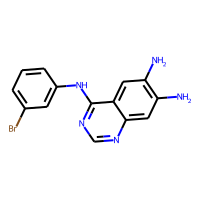

In [16]:
project1.Ligand()

# NBVAL_CHECK_OUTPUT

All of this information and some other properties are also stored separately as instance attributes.

For example, the ligand's identifiers:

In [17]:
project1.Ligand.iupac_name

# NBVAL_CHECK_OUTPUT

'4-N-(3-bromophenyl)quinazoline-4,6,7-triamine'

In [18]:
project1.Ligand.cid

# NBVAL_CHECK_OUTPUT

'2426'

Or some of its physiochemical properties:

In [19]:
project1.Ligand.mol_weight

# NBVAL_CHECK_OUTPUT

330.189

In [20]:
project1.Ligand.logp

# NBVAL_CHECK_OUTPUT

3.3

We have also implemented some useful functions as methods for the ***Ligand*** class. For example, the ***remove_counterion*** method can be used to remove salt compounds from the main molecule in the SMILES. This is necessary for the docking process as *Smina* can have problems processing PDBQT files of salt compounds. 

Calling this method will simply return the modified SMILES. In the case of our ligand, which is not charged and does not have a counter-ion, the original SMILES is returned: 

In [21]:
project1.Ligand.remove_counterion()

# NBVAL_CHECK_OUTPUT

'C1=CC(=CC(=C1)Br)NC2=NC=NC3=CC(=C(C=C32)N)N'

<a id='5_practical'></a>

## Binding Site Detection

Now that the processing of all input data is completed, we can begin the binding site detection process. In the input CSV file, you'll notice thatthe user has the option to select between three definition methods for the binding site:

1. ***coordinates***: The user must specify the coordinates of the binding site. In this case, there is no need for binding-site detection. 
2. ***ligand***: The user should specify the ID of a co-crystallized ligand in the protein structure. This will then be used here to define the binding site. 
3. ***detection***: The user should specify a ***detection method***. 

For this talktorial we will implement one detection method, the ***DoGSiteScorer*** functionality of the <a href="https://proteins.plus">***ProteinsPlus***</a> webserver. We use a helper-class for communicating with the webserver's API and submitting detection jobs and then import the pipeline's ***BindingSiteDetection*** class, which processes the input specification data on the binding site and acts accordingly. 


### The ***DoGSiteScorer*** Helper-Class

*DoGSiteScorer* provides a web-service <a href="https://proteins.plus/help/dogsite_rest">API</a>. This can be used to submit binding-site detection jobs, either by providing the PDB-code of protein structure, or by uploading its PDB file. It returns a table of all detected pockets and sub-pockets and their corresponding descriptors. For each detected (sub-)pocket, a PDB file and a <a href="https://www.ccp4.ac.uk/html/maplib.html#description">CCP4</a> map file is generated. These can be downloaded and used to define the coordinates of the pocket of sub-pocket needed for the docking calculation and visualization. The function ***select_best_pocket*** is also defined which provides several methods for selecting the most suitable binding-site.

***Note:*** For a demonstration of each function, see the <a href="#dogsitescorer_demo">corresponding section</a> in *Supplementary Information*.

### Implementing The Pipeline's ***BindingSiteDetection*** Class

Now we can automate the binding-site detection process by importing the ***BindingSiteDetection*** class of the pipeline. Depending on the input specifications, operations are carried out to output the coordinates of the selected binding site based on the input data.

### Automatically Calculating the Binding-Site: Instantiating The ***BindingSiteDetection*** Class

We can now instantiate the ***BindingSiteDetection*** class using the ***Protein*** object, the ***Specs.BindingSite*** object, and the binding-site output path of our project. This will automatically run all the processes needed to build the structure of the binding-site, based on the specifications in the input data. The results will then be stored as instance attributes in the instantiated ***BindingSiteDetection*** object. 

We thus assign this object to our project: 

In [22]:
from utils import DoGSiteScorer, BindingSiteDetection

project1.BindingSiteDetection = BindingSiteDetection(
    project1.Protein,
    project1.Specs.BindingSite,
    project1.Specs.OutputPaths.binding_site_detection,
)

All intermediate information leading to the selected binding-pocket's coordinates is now stored in the ***BindingSiteDetection*** instance of our project.

For example, a dataframe containing all retrieved information on all detected binding sites:

In [23]:
project1.BindingSiteDetection.dogsitescorer_binding_sites_df

# NBVAL_CHECK_OUTPUT

,lig_cov,poc_cov,lig_name,volume,enclosure,surface,depth,surf/vol,lid/hull,ellVol,ell c/a,ell b/a,siteAtms,accept,donor,hydrophobic_interactions,hydrophobicity,metal,Cs,Ns,Os,Ss,Xs,negAA,posAA,polarAA,apolarAA,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL,simpleScore,drugScore,pdb_file_url,ccp4_file_url
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P_0,85.48,31.22,W32_A_1101,1422.66,0.10,1673.75,19.26,1.176493,-,-,0.13,0.67,288,86,40,71,0.36,0,198,45,41,4,0,0.10,0.13,0.24,0.53,4,5,2,5,2,2,1,5,0,3,12,3,2,3,3,1,2,1,1,5,0.63,0.810023,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_gpsAll.ccp4.gz
P_0_0,85.48,73.90,W32_A_1101,599.23,0.06,540.06,17.51,0.901257,-,-,0.14,0.22,131,35,13,25,0.34,0,95,16,17,3,0,0.03,0.10,0.28,0.59,1,2,1,1,2,1,0,2,0,2,7,1,2,2,1,0,2,0,0,2,0.59,0.620201,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_0_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_0_gpsAll.ccp4.gz
P_0_1,3.23,0.44,W32_A_1101,201.73,0.08,381.07,11.36,1.889010,-,-,0.17,0.25,51,17,9,10,0.28,0,36,6,7,2,0,0.08,0.17,0.25,0.50,1,1,0,1,1,1,0,0,0,0,3,1,1,0,0,0,1,0,0,1,0.17,0.174816,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_1_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_1_gpsAll.ccp4.gz
P_0_2,0.00,0.00,W32_A_1101,185.60,0.17,282.00,9.35,1.519397,-,-,0.45,0.55,48,17,8,12,0.32,0,31,8,8,1,0,0.17,0.25,0.08,0.50,0,2,0,1,0,0,1,1,0,0,2,1,1,1,0,0,0,0,0,2,0.13,0.195695,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_2_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_2_gpsAll.ccp4.gz
P_0_3,6.45,0.29,W32_A_1101,175.30,0.15,297.42,9.29,1.696634,-,-,0.23,0.37,48,16,8,14,0.37,0,32,8,8,0,0,0.14,0.14,0.36,0.36,1,1,1,2,0,0,0,3,0,0,1,1,0,1,1,1,0,0,0,1,0.13,0.168845,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_3_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_3_gpsAll.ccp4.gz
P_0_4,0.00,0.00,W32_A_1101,170.37,0.08,390.10,11.99,2.289722,-,-,0.16,0.20,47,14,7,17,0.45,0,34,7,6,0,0,0.00,0.18,0.18,0.64,2,2,0,0,0,1,0,0,0,1,3,0,0,0,0,0,0,1,1,0,0.15,0.223742,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_4_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_4_gpsAll.ccp4.gz
P_0_5,0.00,0.00,W32_A_1101,90.43,0.24,177.50,6.24,1.962844,-,-,0.70,0.89,26,8,6,5,0.26,0,16,6,4,0,0,0.12,0.25,0.25,0.38,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0.00,0.165232,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_5_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_5_gpsAll.ccp4.gz
P_1,0.00,0.00,W32_A_1101,708.99,0.13,1030.19,14.32,1.453039,-,-,0.14,0.59,140,44,13,34,0.37,0,98,17,25,0,0,0.14,0.11,0.36,0.39,3,1,1,0,0,0,4,4,0,1,4,2,0,1,1,2,2,0,1,1,0.46,0.755915,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_1_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_1_gpsAll.ccp4.gz
P_1_0,0.00,0.00,W32_A_1101,496.90,0.11,739.17,12.72,1.487563,-,-,0.14,0.18,103,34,8,22,0.34,0,74,12,17,0,0,0.18,0.09,0.32,0.41,2,1,1,0,0,0,4,1,0,1,4,1,0,0,1,2,2,0,1,1,0.49,0.465489,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_1_0_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_1_0_gpsAll.ccp4.gz


The name of the selected binding site:

In [24]:
project1.BindingSiteDetection.best_binding_site_name

# NBVAL_CHECK_OUTPUT

'P_0_0'

The coordinates of the binding site are also assigned to the ***Protein*** object in the project:

In [25]:
project1.Protein.binding_site_coordinates

# NBVAL_CHECK_OUTPUT

{'center': [15.91, 32.33, 11.03], 'size': [24.84, 24.84, 24.84]}

We can also visualize the binding pocket:

In [26]:
project1.BindingSiteDetection.visualize_best()

NGLWidget()

Or any other binding pocket by providing its name:

In [27]:
project1.BindingSiteDetection.visualize("P_0")

NGLWidget()

<a id='6_practical'></a>

## Ligand Similarity Search

With the coordinates of the protein's binding-site in hand, we now focus on the ligand similarity-search part of the pipeline. To perform a similarity-search, we will use the *PubChem* webserver. We have already imported all the required functions to perform the similarity-search in the ***PubChem*** helper-class that we used for developing the ***Ligand*** class. We can now directly commence with importing the ***LigandSimilaritySearch*** class of the pipeline. 

Again, for a demonstration of each function, see the <a href="#dogsitescorer_demo">corresponding section</a> in *Supplementary Information*.

### Implementing The Pipeline's ***LigandSimilaritySearch*** Class

Here the similarity-search process of the pipeline is automated. This class will take in the ***Ligand*** object and the ***Specs.LigandSimilaritySearch*** object of the pipeline and initialize a similarity search using the *PubChem* webserver. Several drug-likeness scores are calculated for each of the analogs retrieved. Using these scores, a given number (specified in the input file) of most drug-like analogs are then selected and used to create ***Ligand*** objects with the help of the ***Ligand*** class that we used earlier. 

#### Finding Structural Analogs of the Input Ligand: Instantiating The ***LigandSimilaritySearch*** Class

By instantiating the ***LigandSimilaritySearch*** class with the ***Ligand*** object and the ***Specs.LigandSimilaritySearch*** data-class of the project, analogs are automatically found and turned to ***Ligand*** objects. These are assigned as an instance attribute to the ***LigandSimilaritySearch*** class as well as the input ***Ligand*** object. For this project, this process will take ***about 2 minutes*** to complete. 

We instantiate the class and assign it to our project:

In [28]:
from utils import LigandSimilaritySearch

project1.LigandSimilaritySearch = LigandSimilaritySearch(
    project1.Ligand,
    project1.Specs.LigandSimilaritySearch,
    project1.Specs.OutputPaths.similarity_search,
)

Now we can view the full list of all fetched analogs, their calculated physiochemical properties and drug-likeness scores. Shown here are the first 5 entries:

,CanonicalSMILES,Mol,dice_similarity,mol_weight,num_H_acceptors,num_H_donors,logp,tpsa,num_rot_bonds,saturation,drug_score_qed,drug_score_lipinski,drug_score_custom,drug_score_total
CID,,,,,,,,,,,,,,
4705,COC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=CC=C3)Br)OC,,0.80,360.211,5,1,4.15,56.27,4,0.12,0.76,1.0,0.74,0.79
62274,CC1=CC2=C(C=CC=N2)C3=C1N(C(=N3)N)C,,0.34,212.256,4,1,2.01,56.73,0,0.17,0.62,1.0,0.70,0.71
7019,C1=CC=C2C(=C1)C(=C3C=CC=CC3=N2)N,,0.33,194.237,2,1,2.97,38.91,0,0.00,0.56,1.0,0.63,0.66
2723800,CC1=CC2=C(C=C1N)[N+](=C3C=C(C(=CC3=N2)C)N)C4=CC=CC=C4.[Cl-],,0.33,350.853,3,2,0.45,68.81,1,0.10,0.30,1.0,0.70,0.55
62389,C1=CC=C(C=C1)CNC2=NC=NC3=C2NC=N3,,0.32,225.255,4,2,1.96,66.49,3,0.08,0.71,1.0,0.76,0.78

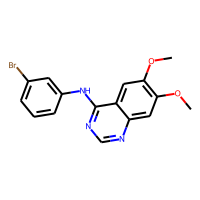
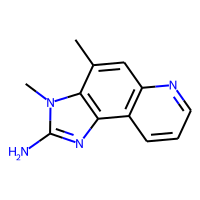
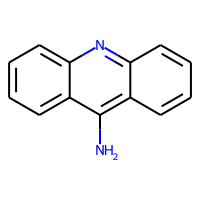
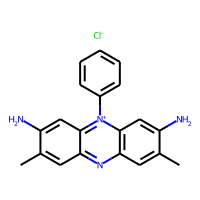
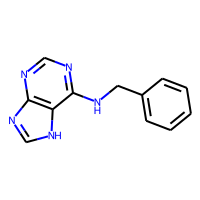

In [29]:
project1.LigandSimilaritySearch.all_analogs.head()

# NBVAL_CHECK_OUTPUT

From these analogs, a certain number of most drug-like compounds are selected according to the input specifications.  These selected analogs are then turned into ***Ligand*** objects and assigned to the input ***Ligand*** under the attribute name ***analogs***: 

In [30]:
project1.Ligand.analogs

# NBVAL_CHECK_OUTPUT

{'65997': <Ligand CID: 65997>,
 '2435': <Ligand CID: 2435>,
 '57469': <Ligand CID: 57469>,
 '4705': <Ligand CID: 4705>,
 '5011': <Ligand CID: 5011>,
 '62389': <Ligand CID: 62389>,
 '11292933': <Ligand CID: 11292933>,
 '1530': <Ligand CID: 1530>,
 '214347': <Ligand CID: 214347>,
 '11256587': <Ligand CID: 11256587>,
 '1935': <Ligand CID: 1935>,
 '62274': <Ligand CID: 62274>,
 '53462': <Ligand CID: 53462>,
 '6451164': <Ligand CID: 6451164>,
 '62275': <Ligand CID: 62275>,
 '7019': <Ligand CID: 7019>,
 '62805': <Ligand CID: 62805>,
 '675': <Ligand CID: 675>,
 '5546': <Ligand CID: 5546>,
 '135398510': <Ligand CID: 135398510>}

The list contains ***Ligand*** objects corresponding to each analog found. Each analog has thus its own attributes and methods, just like our input ***Ligand***, which can be accessed separately via the analog's CID. For example:

Value
Structure                                                                                                                                                                                                Property                                                                                                                    
<img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAd80lEQVR4nO2deVxUR7bHz+1mXxQBUSFGwSWAGnQUdUSNCRA3IOoMcdwS13aZiIm... name                                                                                                              Lerisetron
                                                                                                                                                                                                         iupac_name                                                                            1-benzyl-2-piperazin-1-ylbenzimidazole
                                                                                                                                                                                                         smiles                                                                               C1CN(CCN1)C2=NC3=CC=CC=C3N2CC4=CC=CC=C4
                                                                                                                                                                                                         cid                                                                                                                    65997
                                                                                                                                                                                                         inchi                InChI=1S/C18H20N4/c1-2-6-15(7-3-1)14-22-17-9-5-4-8-16(17)20-18(22)21-12-10-19-11-13-21/h1-9,19H,10-14H2
                                                                                                                                                                                                         inchikey                                                                                         PWWDCRQZITYKDV-UHFFFAOYSA-N
                                                                                                                                                                                                         mol_weight                                                                                                           292.386
                                                                                                                                                                                                         num_H_acceptors                                                                                                            4
                                                                                                                                                                                                         num_H_donors                                                                                                               1
                                                                                                                                                                                                         logp                                                                                                                    2.49
                                                                                                                                                                                                         tpsa                                                                                                                   33.09
                                                                                  
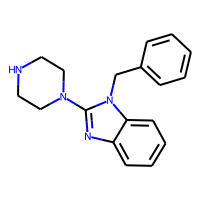

In [31]:
project1.Ligand.analogs["65997"]()

# NBVAL_CHECK_OUTPUT

<a id='7_practical'></a>

## Molecular Docking 

We now have successfully defined the binding site of our input protein and found a list of analogs for our input ligand. The next step in the pipeline is to perform docking calculations on the protein binding site using the ligand analogs. But before that we need to import some helper functions that are needed to prepare the protein and the analogs for docking.

### The ***OBabel*** Helper-Class

Here the ***<a href="https://github.com/pybel/pybel">Pybel</a>*** package of the ***<a href="http://openbabel.org/wiki/Main_Page">OpenBabel</a>*** program is used in order to implement the functions needed to prepare the protein and the ligand analogs for docking.


### The ***Smina*** Helper-Class


For docking we are going to use the <a href="https://sourceforge.net/projects/smina/">***Smina***</a> program. It does not have a Python-API but we can simply communicate with the program via shell commands. Contained within the class is a function to read the output log of the program and extract useful data. These functions are implemented in the ***Smina*** helper-class.


### The Pipeline's ***Docking*** Class


Finally, the ***Docking*** class is implemented and automatically performs docking calculations on all provided ligands.


### Performing Docking Experiments on The Selected Analogs: Instantiating The ***Docking*** Class


By instantiating the ***Docking*** class with the ***Protein*** object, the list of analogs and the ***Specs.Docking*** data class of the project, analogs are automatically docked into the protein and results are stored separately for each docking pose. Other meaningful information is extracted from the results of all docking poses for each analog and stored separately. This is the most computationally intense process of the pipeline and will take ***5 to 10 minutes*** (for 20 ligands) to complete.

We instantiate the class and assign it to our project:


In [32]:
from utils import OBabel, Smina, Docking

project1.Docking = Docking(
    project1.Protein,
    list(project1.Ligand.analogs.values()),
    project1.Specs.Docking,
    project1.Specs.OutputPaths.docking,
)

/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:426: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use

We can now view all the calculated docking parameters for each docking pose of each analog. Here we show only the 5 first entries:


In [33]:
project1.Docking.results_dataframe.sort_values(by="affinity[kcal/mol]").head()

# NBVAL_CHECK_OUTPUT

affinity[kcal/mol]  dist from best mode_rmsd_l.b  \
CID       mode                                                     
11292933  1                  -10.3                         0.000   
          2                  -10.2                         1.260   
135398510 1                  -10.1                         0.000   
11292933  3                   -9.9                         1.992   
          4                   -9.8                         3.040   

                dist from best mode_rmsd_u.b  drug_score_total  
CID       mode                                                  
11292933  1                            0.000              0.77  
          2                            2.802              0.77  
135398510 1                            0.000              0.62  
11292933  3                            2.609              0.77  
          4                           10.387              0.77

Alternatively, by accessing a specific analog, we can view the full results for that analog using the attribute ***dataframe_docking***:


In [34]:
project1.Ligand.analogs["11292933"].dataframe_docking

# NBVAL_CHECK_OUTPUT

,affinity[kcal/mol],dist from best mode_rmsd_l.b,dist from best mode_rmsd_u.b
mode,,,
1,-10.3,0.000,0.000
2,-10.2,1.260,2.802
3,-9.9,1.992,2.609
4,-9.8,3.040,10.387
5,-9.6,4.116,9.639


A summary of the docking results (e.g. highest/mean binding affinities) are also added to the main dataframe of each analog and can be viewed by calling its object. Here only the most relevant seven rows are shown:
    

Value
Structure                                                                                                                                                                                                Property                                 
<img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAaVElEQVR4nO3deVgT194H8F8IRFaFQlUQlaK4EFQ0ggsqVqxelauo5dWioF4rqCi... binding_affinity_best               -10.3
                                                                                                                                                                                                         binding_affinity_mean               -9.96
                                                                                                                                                                                                         binding_affinity_std             0.288097
                                                                                                                                                                                                         docking_poses_dist_rmsd_lb_mean    2.0816
                                                                                                                                                                                                         docking_poses_dist_rmsd_lb_std   1.586933
                                                                                                                                                                                                         docking_poses_dist_rmsd_ub_mean    5.0874
                                                                                                                                                                                                         docking_poses_dist_rmsd_ub_std   4.638156
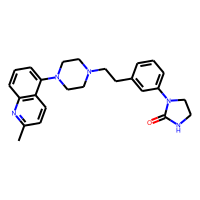

In [35]:
project1.Ligand.analogs["11292933"]().tail(7)

# NBVAL_CHECK_OUTPUT

The same summary results are also added as instance attributes for each object:
    

In [36]:
project1.Ligand.analogs["11292933"].binding_affinity_best

# NBVAL_CHECK_OUTPUT

-10.3

Now with the help of the ***NGLView*** helper-class, we have additional methods to the ***Docking*** class for visualization of the docked poses. For example, we can view all docked poses together in an interactive way using the ***visualize_all_poses*** method. In this method, poses are sorted by their binding affinities and labeled by their CID and corresponding pose number. By selecting an analog from the menu below, the viewer automatically shows the protein residues in close proximity (i.e. 6 Å) of the ligand, as well as its corresponding binding affinity.

If we are interested in visualization of a certain analog's docking poses, we can use the ***visualize_analog_poses*** method instead, and provide the analog's CID.
    

In [37]:
project1.Docking.visualize_all_poses()

Docking modes
(CID - mode)


AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

Now let's separately dock the input ligand in order to be able to compare the results later and see whether any of the analogs has a higher binding affinity:
    

In [38]:
project1.Ligand.Docking = Docking(
    project1.Protein,
    [project1.Ligand],
    project1.Specs.Docking,
    project1.Specs.OutputPaths.ligand,
)

/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:426: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use

Similar to the analogs, the docking results of the input ligand is also stored in it's object. 

For example, to see the docking dataframe:
   

In [39]:
project1.Ligand.dataframe_docking

# NBVAL_CHECK_OUTPUT

,affinity[kcal/mol],dist from best mode_rmsd_l.b,dist from best mode_rmsd_u.b
mode,,,
1,-8.8,0.000,0.000
2,-8.7,1.843,2.306
3,-8.7,2.998,4.718
4,-8.7,3.633,5.238
5,-8.4,2.634,3.597


<a id='8_practical'></a>

## Analysis of Protein–Ligand Interactions

With the docked poses of each analog in hand, we can now focus on analyzing the protein-ligand interactions in each docking pose of each analog. For the analysis we use the ***PLIP*** package, for which a helper class is defined.
    

### The ***PLIP*** Helper-Class

Here the <a href="https://github.com/pharmai/plip">PLIP</a> package is used to implement the functions needed to analyze non-covalent protein-ligand interactions. 

### The Pipeline's ***InteractionAnalysis*** Class

The class automatically calculates all interaction information for each docked pose of each ligand. 

### Analyzing the Protein-Ligand Interactions in Calculated Docking Poses: Instantiating The ***InteractionAnalysis*** Class

The ***InteractionAnalysis*** class can be instantiated by providing the filepaths of the separated protein structure, a list of all analogs (as ***Ligand*** objects), the results dataframe of the docking process, and the output path for storing the interaction analysis data:

In [40]:
from utils import PLIP, InteractionAnalysis

project1.InteractionAnalysis = InteractionAnalysis(
    project1.Docking.pdbqt_filepath_extracted_protein,
    project1.Docking.pdb_filepath_extracted_protein,
    project1.Protein.residue_number_first,
    list(project1.Ligand.analogs.values()),
    project1.Docking.master_df,
    project1.Specs.InteractionAnalysis,
    project1.Specs.OutputPaths.interaction_analysis,
)

The interactions can now be inspected collectively for all docking poses of all analogs. Here only the number of interactions are recorded for each interaction type (showing only the 5 first entries):


In [41]:
project1.InteractionAnalysis.results.sort_values(
    by="total_num_interactions", ascending=False
).head()

# NBVAL_CHECK_OUTPUT

affinity[kcal/mol]  dist from best mode_rmsd_l.b  \
CID      mode                                                     
11292933 4                   -9.8                         3.040   
         2                  -10.2                         1.260   
62805    2                   -7.3                         2.635   
1935     2                   -7.3                         0.960   
11256587 4                   -7.6                         2.096   

               dist from best mode_rmsd_u.b  drug_score_total  \
CID      mode                                                   
11292933 4                           10.387              0.77   
         2                            2.802              0.77   
62805    2                            5.359              0.65   
1935     2                            2.653              0.74   
11256587 4                            5.548              0.75   

               total_num_interactions  h_bond  hydrophobic  salt_bridge  \
CID      mode                                                             
11292933 4                         13       1           12            0   
         2                         12       3            8            1   
62805    2                         11       4            7            0   
1935     2                         11       2            9            0   
11256587 4                         11       0           10            1   

               water_bridge  pi_stacking  pi_cation  halogen  metal  
CID      mode                                                        
11292933 4                0            0          0        0      0  
         2                0            0          0        0      0  
62805    2                0            0          0        0      0  
1935     2                0            0          0        0      0  
11256587 4                0            0          0        0      0


If we are interested in the details of a specific interaction type for a specific docking pose, we can access this information from the corresponding ***Ligand*** objects of the analogs. 
    
For example, accessing the data for hydrophobic interactions of the docking pose 1 of analog 65997 (showing only the 5 first entries):   

In [42]:
project1.Ligand.analogs["65997"].docking_pose_1_interactions_hydrophobic.head()

# NBVAL_CHECK_OUTPUT

,RESNR,RESTYPE,RESCHAIN,RESNR_LIG,RESTYPE_LIG,RESCHAIN_LIG,DIST,LIGCARBONIDX,PROTCARBONIDX,LIGCOO,PROTCOO
0,790,THR,A,1,UNL,A,3.94,2566,307,"(15.923, 34.208, 10.594)","(12.237, 33.433, 9.444)"
1,792,LEU,A,1,UNL,A,3.88,2557,1005,"(14.022, 35.211, 16.232)","(11.186, 37.568, 15.018)"
2,844,LEU,A,1,UNL,A,3.76,2558,1215,"(14.717, 34.344, 15.383)","(13.961, 30.7, 14.816)"
3,854,THR,A,1,UNL,A,3.71,2569,1250,"(17.721, 32.311, 11.556)","(16.714, 28.916, 12.649)"
4,743,ALA,A,1,UNL,A,3.75,2566,521,"(15.923, 34.208, 10.594)","(13.145, 36.521, 11.607)"


Or hydrogen-bond interactions of docking pose 2 of analog 11292933:
    

In [43]:
project1.Ligand.analogs["11292933"].docking_pose_2_interactions_h_bond.head()

# NBVAL_CHECK_OUTPUT

,RESNR,RESTYPE,RESCHAIN,RESNR_LIG,RESTYPE_LIG,RESCHAIN_LIG,SIDECHAIN,DIST_H-A,DIST_D-A,DON_ANGLE,PROTISDON,DONORIDX,DONORTYPE,ACCEPTORIDX,ACCEPTORTYPE,LIGCOO,PROTCOO
0,855,ASP,A,1,UNL,A,False,3.39,3.86,111.20,True,29,Nam,2575,Nam,"(17.341, 28.354, 5.727)","(17.692, 27.727, 9.517)"
1,856,PHE,A,1,UNL,A,False,2.14,2.95,136.32,False,2575,Nam,20,O2,"(17.341, 28.354, 5.727)","(18.707, 25.862, 4.918)"
2,842,ASN,A,1,UNL,A,True,2.33,3.29,154.09,False,2549,N3,1208,O2,"(19.176, 32.008, 12.505)","(20.864, 29.305, 13.306)"


Again, a summary of interaction analysis data is also added to each analog's main dataframe. This can be viewed by calling the object here showing only the relevant data, i.e. the last 9 rows:
    

Value
Structure                                                                                                                                                                                                Property                            
<img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAaVElEQVR4nO3deVgT194H8F8IRFaFQlUQlaK4EFQ0ggsqVqxelauo5dWioF4rqCi... average_num_total_interactions  10.6
                                                                                                                                                                                                         average_num_h_bond               1.8
                                                                                                                                                                                                         average_num_hydrophobic          8.4
                                                                                                                                                                                                         average_num_salt_bridge          0.2
                                                                                                                                                                                                         average_num_water_bridge         0.0
                                                                                                                                                                                                         average_num_pi_stacking          0.0
                                                                                                                                                                                                         average_num_pi_cation            0.2
                                                                                                                                                                                                         average_num_halogen              0.0
                                                                                                                                                                                                         average_num_metal                0.0
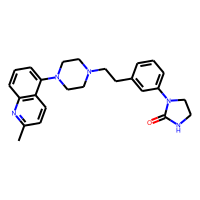

In [44]:
project1.Ligand.analogs["11292933"]().tail(9)

# NBVAL_CHECK_OUTPUT

Let's use ***plot_interaction_affinity_correlation*** function and see if there is any visible correlation between the calculated binding affinities and the number of interactions for each docking pose:
    

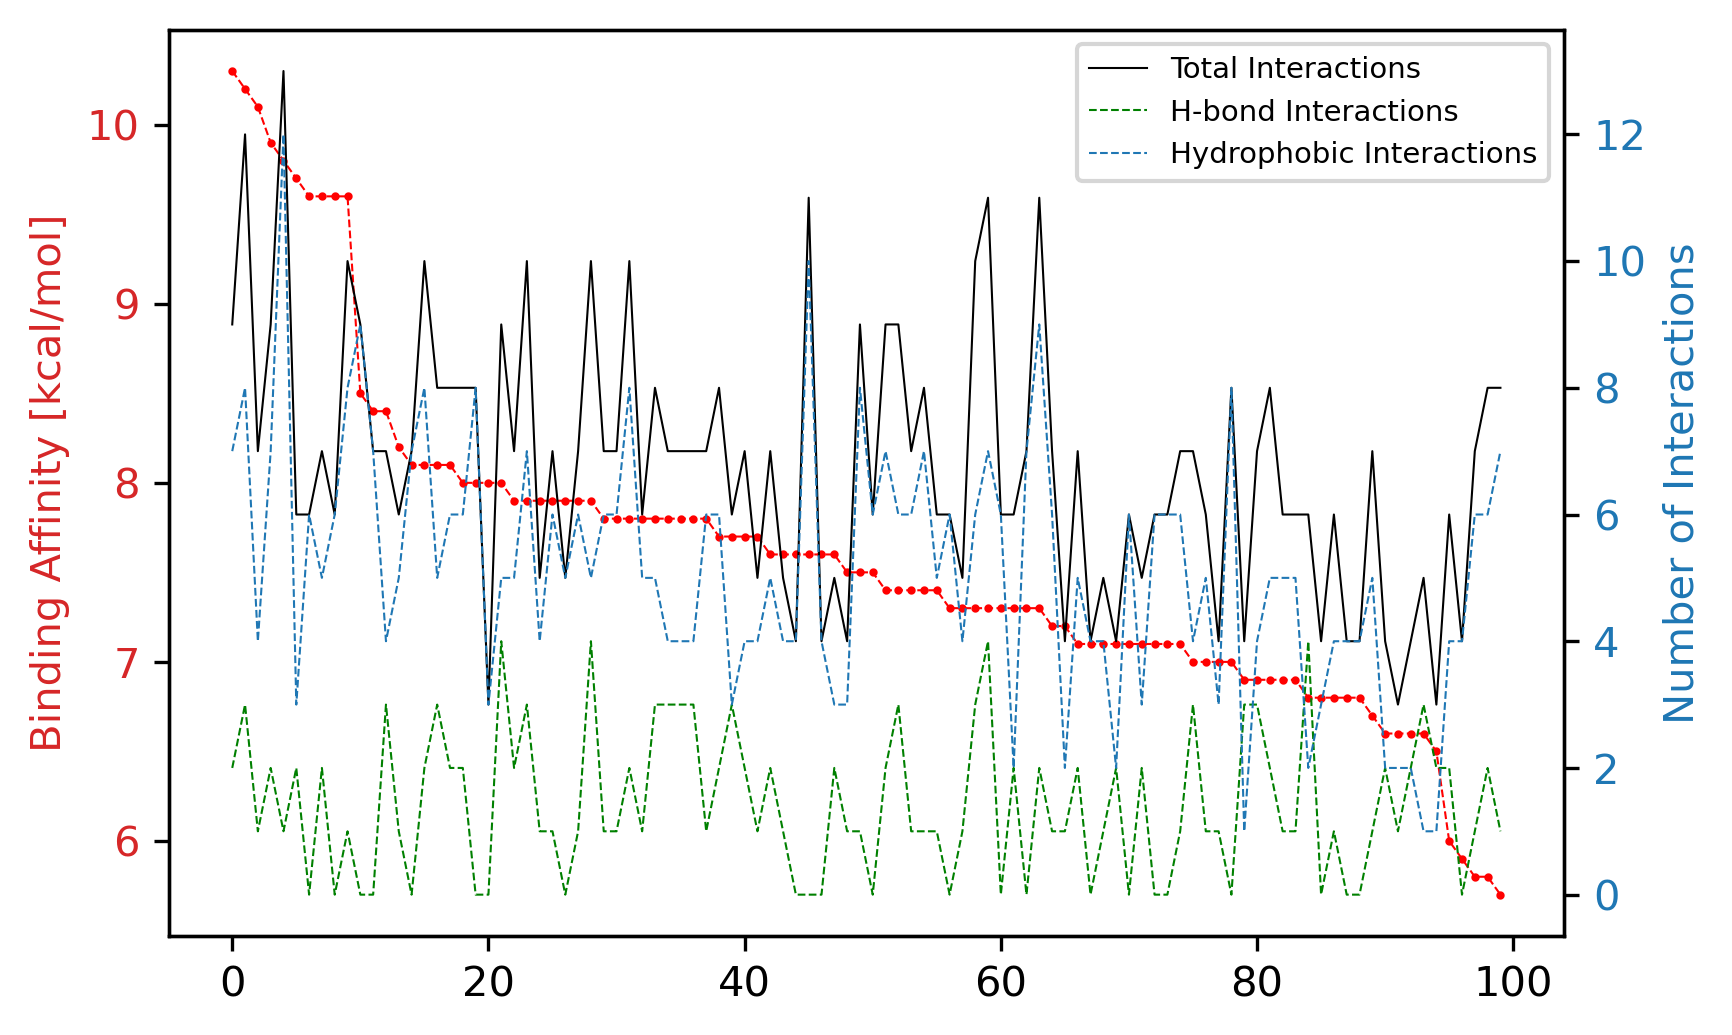

In [45]:
project1.InteractionAnalysis.plot_interaction_affinity_correlation()

No obvious correlation is visible between the two sets of data. The number of total interactions is weakly correlated with the binding affinity, albeit with several outliers.

Now with the help of the ***NGLView*** helper-class, we have also additional methods in the ***InteractionAnalysis*** class for visualization of the protein-ligand interactions. For example, we can now view the interactions for all docking poses in an interactive way. By selecting each docking pose (labeled by their CID and mode-number and sorted by their binding affinities), all the interacting residues are shown. The interactions are visualized with colored lines for which a color-map is also provided.

If we are interested in visualization of a certain analog's interactions, we can use the ***visualize_analog_interactions*** method instead, and provide the analog's CID.


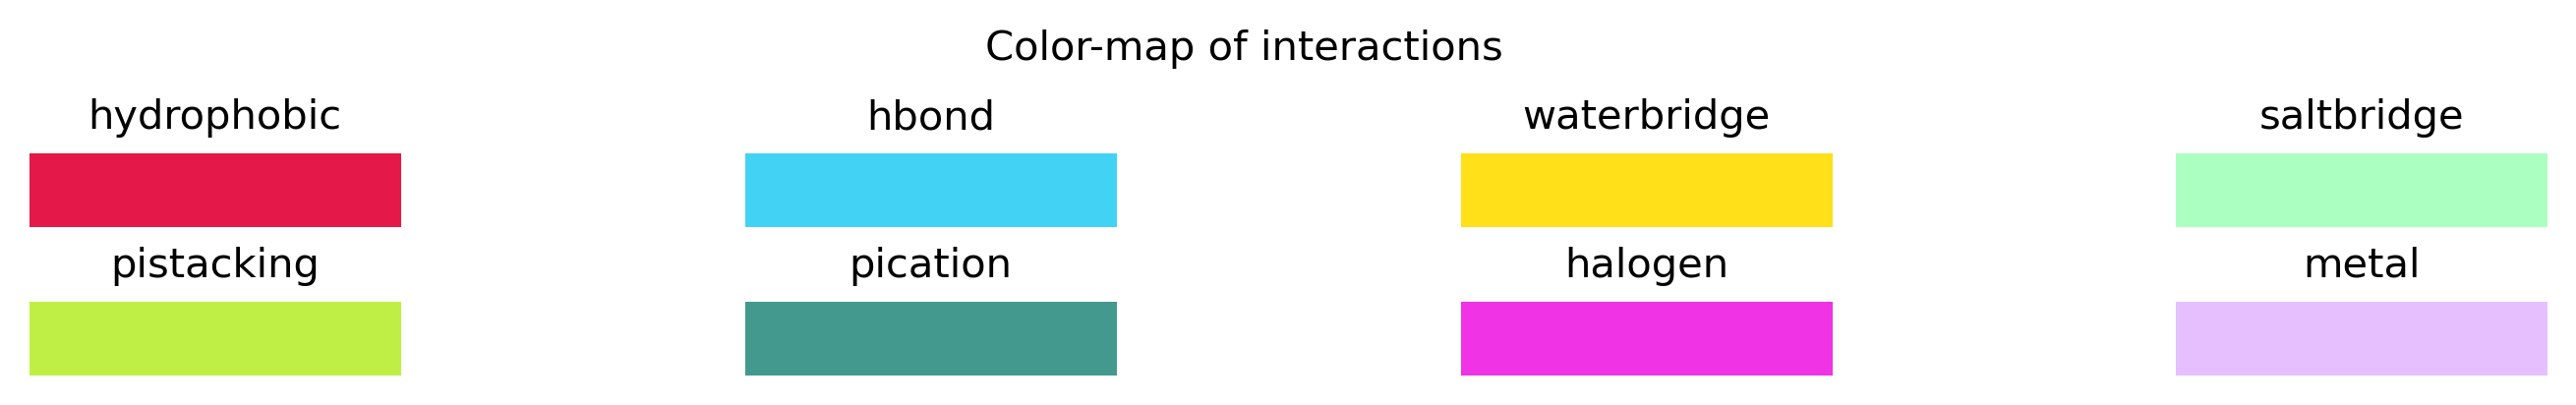

AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

In [46]:
project1.InteractionAnalysis.visualize_all_interactions()

We can also search for docked poses displaying a specific set of interactions with specific residues of the protein using the ***find_poses_with_specific_interactions*** method. 
    
For example, many EGFR inhibitors are involved in hydrogen-bonding with the M793 residue of the protein. To find the docking poses that exhibit this interaction:    

In [47]:
desired_interactions = project1.InteractionAnalysis.find_poses_with_specific_interactions(
    [["h_bond", 793]], "any"
)
desired_interactions

# NBVAL_CHECK_OUTPUT

[('65997', 4),
 ('11256587', 5),
 ('1935', 2),
 ('62274', 4),
 ('62274', 5),
 ('53462', 4),
 ('62275', 5),
 ('7019', 1),
 ('7019', 2),
 ('5546', 2)]

And we can also visualize the results separately instead of looking for them in the menu of the viewer above.    

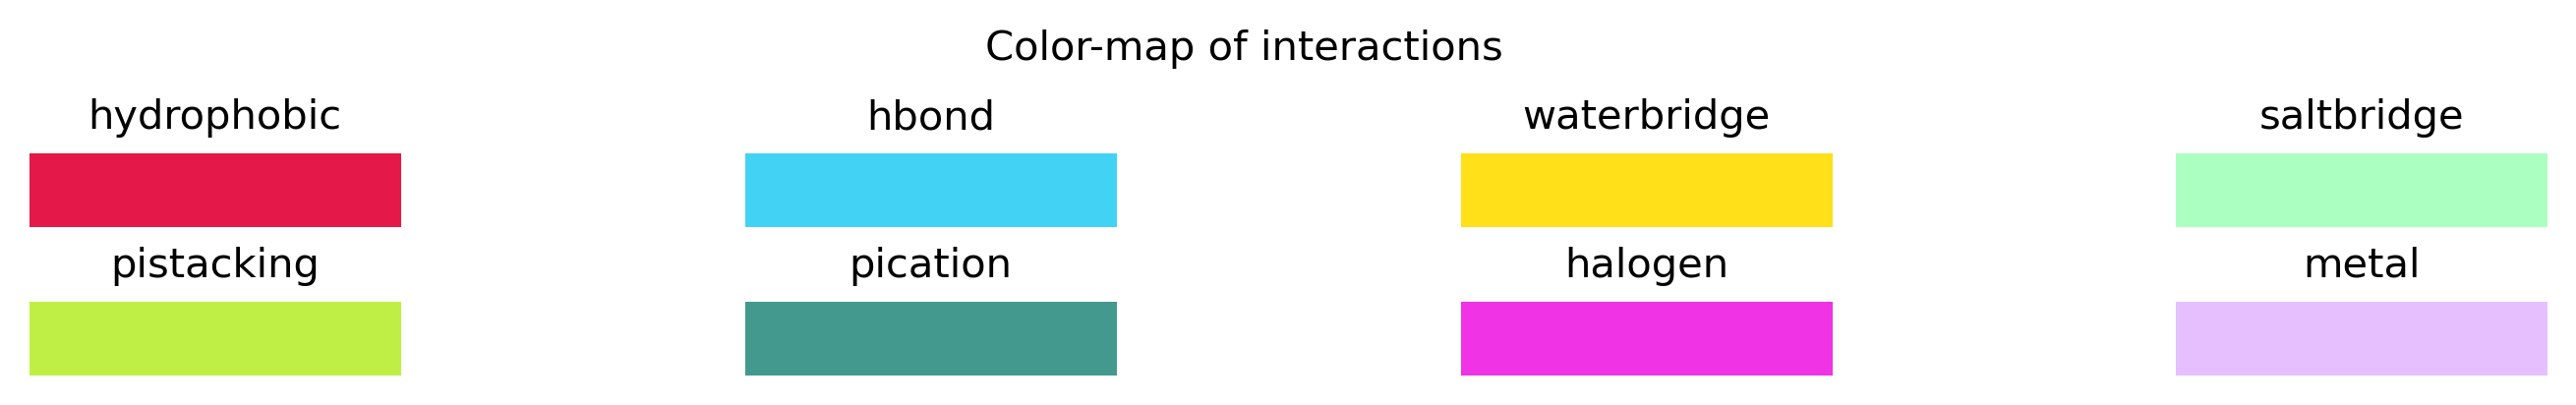

AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

In [48]:
project1.InteractionAnalysis.visualize_docking_poses_interactions(desired_interactions)

Now let's also analyze the interactions in the docking poses of the input ligand:    

In [49]:
project1.Ligand.InteractionAnalysis = InteractionAnalysis(
    project1.Docking.pdbqt_filepath_extracted_protein,
    project1.Docking.pdb_filepath_extracted_protein,
    project1.Protein.residue_number_first,
    [project1.Ligand],
    project1.Ligand.Docking.master_df,
    project1.Specs.InteractionAnalysis,
    project1.Specs.OutputPaths.ligand,
)

The results can be viewed in a similar way to the analogs. For example, to view the summary data:    

In [50]:
project1.Ligand.InteractionAnalysis.results.sort_values(
    by="total_num_interactions", ascending=False
)

# NBVAL_CHECK_OUTPUT

affinity[kcal/mol]  dist from best mode_rmsd_l.b  \
CID  mode                                                     
2426 2                   -8.7                         1.843   
     3                   -8.7                         2.998   
     4                   -8.7                         3.633   
     1                   -8.8                         0.000   
     5                   -8.4                         2.634   

           dist from best mode_rmsd_u.b  drug_score_total  \
CID  mode                                                   
2426 2                            2.306               0.7   
     3                            4.718               0.7   
     4                            5.238               0.7   
     1                            0.000               0.7   
     5                            3.597               0.7   

           total_num_interactions  h_bond  hydrophobic  salt_bridge  \
CID  mode                                                             
2426 2                          8       2            6            0   
     3                          8       5            3            0   
     4                          8       5            3            0   
     1                          6       2            4            0   
     5                          5       0            5            0   

           water_bridge  pi_stacking  pi_cation  halogen  metal  
CID  mode                                                        
2426 2                0            0          0        0      0  
     3                0            0          0        0      0  
     4                0            0          0        0      0  
     1                0            0          0        0      0  
     5                0            0          0        0      0

<a id='9_practical'></a>

## Selection of the Best Ligand

At this point, we have carried out all the processes in the pipeline and have gathered all the information in our ***LeadOptimizationPipeline*** instance, i.e. ***project1***. The project now contains all information required for making an optimal choice of analog. 

To recap, we gathered a number of analogs to the input ligand and filtered them to choose those with the highest drug-likeness scores. We then calculated several docking poses and corresponding binding affinities for each analog and analyzed their interactions with the protein. 

Now we inport a class, ***OptimizedLigands***, which takes in the whole project, and based on the specifications in the input file, selects the best analog. To do this, we instantiate the class, and assign it to our project:


In [51]:
from utils import OptimizedLigands

project1.OptimizedLigands = OptimizedLigands(project1)

The class has a ***__call__*** method, which prints out a summary:    

In [52]:
project1.OptimizedLigands()

<span style='color:blue'>Number of docking poses with higher binding affinity than highest binding affinity of ligand: </span><span style='color:black'>10</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['11292933', '135398510']</span>

<span style='color:blue'>Number of docking poses with higher number of total interactions than highest interacting pose of ligand: </span><span style='color:black'>18</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['11292933', '62805', '1935', '11256587', '6451164', '214347', '5011', '4705', '57469', '7019', '65997']</span>

<span style='color:blue'>Number of docking poses with higher affinity and number of total interactions than best corresponding poses of ligand: </span><span style='color:black'>5</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['11292933']</span>

<span style='color:blue'>CIDs of analogs with higher binding affinity, number of total interactions and drug-likeness score than ligand: </span><span style='color:black'>['11292933']</span>

<span style='color:blue'>**CIDs of selected analogs as final output:** </span><span style='color:black'>['11292933']</span>

<span style='color:blue'>Comparison between the input ligand and optimized analog: </span><span style='color:black'></span>

,Input Ligand,Optimized Analog
Drug-Score,0.7,0.77
Highest Binding Affinity,-8.8,-10.30
Highest Number of Total Interactions,8.0,13.00


The pipeline successfully found an analog which is better than the input ligand in all of the three metrics, i.e. drug-likeness, binding affinity, and total number of protein-ligand interactions.  

We can simply visualize each of the above groups of analogs:

Value
Structure                                                                                                                                                                                                Property                                                                                                                                                                              
<img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAaVElEQVR4nO3deVgT194H8F8IRFaFQlUQlaK4EFQ0ggsqVqxelauo5dWioF4rqCi... name                                                                                                  1-(3-(2-(4-(2-Methyl-5-quinolinyl)-1-piperazinyl)ethyl)phenyl)-2-imidazolidinone
                                                                                                                                                                                                         iupac_name                                                                                            1-[3-[2-[4-(2-methylquinolin-5-yl)piperazin-1-yl]ethyl]phenyl]imidazolidin-2-one
                                                                                                                                                                                                         smiles                                                                                                                      CC1=NC2=C(C=C1)C(=CC=C2)N3CCN(CC3)CCC4=CC(=CC=C4)N5CCNC5=O
                                                                                                                                                                                                         cid                                                                                                                                                                           11292933
                                                                                                                                                                                                         inchi                            InChI=1S/C25H29N5O/c1-19-8-9-22-23(27-19)6-3-7-24(22)29-16-14-28(15-17-29)12-10-20-4-2-5-21(18-20)30-13-11-26-25(30)31/h2-9,18H,10-17H2,1H3,(H,26,31)
                                                                                                                                                                                                         inchikey                                                                                                                                                   ANGUXJDGJCHGOG-UHFFFAOYSA-N
                                                                                                                                                                                                         mol_weight                                                                                                                                                                     415.541
                                                                                                                                                                                                         num_H_acceptors                                                                                                                                                                      4
                                                                                                                                                                                                         num_H_donors                                                                                                                                                                         1
                                                                                                                                                          
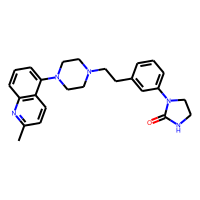

In [53]:
project1.OptimizedLigands.show_final_output()

# NBVAL_CHECK_OUTPUT

<a id='10_practical'></a>

## Putting all the Pieces Together: A Fully Automated Pipeline

Now that we have implemented all the necessary parts of our pipeline, we can write a function to automatically run the whole pipeline and display the results. The function thus takes in the project name, the filepath of the input data and the output path and performs all the necessary processes to generate the final output. It will also print the intermediate results of each part of the pipeline so that the process can be followed.


In [54]:
def run_pipeline(project_name, input_data_filepath, output_data_root_folder_path):
    """
    Automatically run the whole lead optimization pipeline to completion,
    and print out a summary in real-time.

    Parameters
    ----------
    project_name : str
        Name of the lead optimization project.
    input_data_filepath : str or pathlib.Path object
        Filepath of the input CSV file containing all the specifications of the project.
    output_data_root_folder_path : str or pathlib.Path object
        Root folder path to save the pipeline's data in.

    Returns
    -------
        LeadOptimizationPipeline object
        Object containing all the information about the pipeline.
    """

    def pprint(markdown_list):
        markdown_command = ""
        for command in markdown_list:
            text, color = command
            markdown_command += f"<span style='color:{color}'>{text}</span>"
        display(Markdown(markdown_command))

    def pprint_header(header):
        display(
            Markdown(
                f"<span style='color:blue'>**{header}:** </span><span style='color:green'>Successful</span>"
            )
        )

    project = LeadOptimizationPipeline(project_name=project_name)
    pprint_header("1. Initializing Project")
    pprint([(f"&nbsp;&nbsp;&nbsp;&nbsp;Project name: **{project.name}**", "black")])

    project.Specs = Specs(
        input_data_filepath=input_data_filepath,
        output_data_root_folder_path=f"{output_data_root_folder_path}/{project.name}",
    )
    pprint_header("2. Initializing Input/Output")
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Input data read from: **{input_data_filepath}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Output folders created at: **{output_data_root_folder_path}/{project.name}**",
                "black",
            )
        ]
    )

    project.Protein = Protein(
        identifier_type=project.Specs.Protein.input_type,
        identifier_value=project.Specs.Protein.input_value,
        protein_output_path=project.Specs.OutputPaths.protein,
    )
    pprint_header("3. Processing Protein Data")
    display(project.Protein())

    project.Ligand = Ligand(
        identifier_type=project.Specs.Ligand.input_type,
        identifier_value=project.Specs.Ligand.input_value,
        ligand_output_path=project.Specs.OutputPaths.ligand,
    )
    pprint_header("4. Processing Ligand Data")
    display(project.Ligand())

    project.BindingSiteDetection = BindingSiteDetection(
        project.Protein,
        project.Specs.BindingSite,
        project.Specs.OutputPaths.binding_site_detection,
    )
    pprint_header("5. Binding Site Detection")
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Binding site definition method: **{project.Specs.BindingSite.definition_method.name}**",
                "black",
            )
        ]
    )
    if (
        project.Specs.BindingSite.definition_method
        is Consts.BindingSite.DefinitionMethods.DETECTION
    ):
        pprint(
            [
                (
                    f"&nbsp;&nbsp;&nbsp;&nbsp;Binding site detection method: **{project.Specs.BindingSite.detection_method.name}**",
                    "black",
                )
            ]
        )
        pprint(
            [
                (
                    f"&nbsp;&nbsp;&nbsp;&nbsp;Selection method for best binding site: **{project.Specs.BindingSite.selection_method.name}**",
                    "black",
                )
            ]
        )
        pprint(
            [
                (
                    f"&nbsp;&nbsp;&nbsp;&nbsp;Selection criteria for best binding site: **{project.Specs.BindingSite.selection_criteria}**",
                    "black",
                )
            ]
        )
        pprint(
            [
                (
                    f"&nbsp;&nbsp;&nbsp;&nbsp;Name of selected binding site: **{project.BindingSiteDetection.best_binding_site_name}**",
                    "black",
                )
            ]
        )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Binding site coordinates - center: **{project.Protein.binding_site_coordinates['center']}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Binding site coordinates - size: **{project.Protein.binding_site_coordinates['size']}**",
                "black",
            )
        ]
    )

    display(project.BindingSiteDetection.visualize_best())

    project.LigandSimilaritySearch = LigandSimilaritySearch(
        project.Ligand,
        project.Specs.LigandSimilaritySearch,
        project.Specs.OutputPaths.similarity_search,
    )
    pprint_header("6. Ligand Similarity Search")
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Search engine: **{project.Specs.LigandSimilaritySearch.search_engine.name}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Number of fetched analogs with a similarity higher than **{project.Specs.LigandSimilaritySearch.min_similarity_percent}%**: **{len(project.LigandSimilaritySearch.all_analogs)}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Dice-similarity range of fetched analogs: **{project.LigandSimilaritySearch.all_analogs['dice_similarity'].min()} - {project.LigandSimilaritySearch.all_analogs['dice_similarity'].max()}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;CID of analog with the highest Dice-similarity: **{project.LigandSimilaritySearch.all_analogs.sort_values(by='dice_similarity', ascending=False).head(1).index.values[0]}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Number of selected drug-like analogs: **{len(project.Ligand.analogs)}**",
                "black",
            )
        ]
    )
    sorted_analogs_df = project.LigandSimilaritySearch.all_analogs.sort_values(
        by="drug_score_total", ascending=False
    ).head(len(project.Ligand.analogs))
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Range of drug-likeness score in selected analogs: **{sorted_analogs_df['drug_score_total'].min()} - {sorted_analogs_df['drug_score_total'].max()}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;CID of analog with the highest drug-likeness score: **{sorted_analogs_df.head(1).index.values[0]}**",
                "black",
            )
        ]
    )

    project.Docking = Docking(
        project.Protein,
        list(project.Ligand.analogs.values()),
        project.Specs.Docking,
        project.Specs.OutputPaths.docking,
    )
    project.Ligand.Docking = Docking(
        project.Protein,
        [project.Ligand],
        project.Specs.Docking,
        project.Specs.OutputPaths.ligand,
    )
    pprint_header("7. Docking Experiment")
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Highest binding affinity of input ligand: **{project.Ligand.binding_affinity_best}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Binding affinity range of analogs: **{project.Docking.results_dataframe['affinity[kcal/mol]'].max()} - {project.Docking.results_dataframe['affinity[kcal/mol]'].min()}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Number of analog docking poses with higher affinity than ligand: **{len(project.Docking.results_dataframe[project.Docking.results_dataframe['affinity[kcal/mol]']<project.Ligand.binding_affinity_best].sort_values(by=['affinity[kcal/mol]']))}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Number of analogs with higher affinity than ligand: **{len(set(project.Docking.results_dataframe[project.Docking.results_dataframe['affinity[kcal/mol]']<project.Ligand.binding_affinity_best].sort_values(by=['affinity[kcal/mol]']).index.get_level_values(0)))}**",
                "black",
            )
        ]
    )

    highest_aff_cids = set(
        project.Docking.results_dataframe[
            project.Docking.results_dataframe["affinity[kcal/mol]"]
            < project.Ligand.binding_affinity_best
        ]
        .sort_values(by=["affinity[kcal/mol]"])
        .index.get_level_values(0)
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs with higher affinity than ligand: **{highest_aff_cids}**",
                "black",
            )
        ]
    )

    project.Docking.visualize_all_poses()

    project.InteractionAnalysis = InteractionAnalysis(
        project.Docking.pdbqt_filepath_extracted_protein,
        project.Docking.pdb_filepath_extracted_protein,
        project.Protein.residue_number_first,
        list(project.Ligand.analogs.values()),
        project.Docking.master_df,
        project.Specs.InteractionAnalysis,
        project.Specs.OutputPaths.interaction_analysis,
    )

    project.Ligand.InteractionAnalysis = InteractionAnalysis(
        project.Docking.pdbqt_filepath_extracted_protein,
        project.Docking.pdb_filepath_extracted_protein,
        project.Protein.residue_number_first,
        [project.Ligand],
        project.Ligand.Docking.master_df,
        project.Specs.InteractionAnalysis,
        project.Specs.OutputPaths.ligand,
    )
    pprint_header("8. Protein-Ligand Interaction Analysis")
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Highest number of total interactions in a docking pose of input ligand: **{project.Ligand.InteractionAnalysis.results.sort_values(by='total_num_interactions',ascending=False).head(1)['total_num_interactions'].values[0]}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Range of total number of interactions in docking poses of analogs: **{project.InteractionAnalysis.results['total_num_interactions'].min()} - {project.InteractionAnalysis.results['total_num_interactions'].max()}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Correlation plot between binding affinity and number of interactions in docking poses of analogs:",
                "black",
            )
        ]
    )
    project.InteractionAnalysis.plot_interaction_affinity_correlation()

    display(project.InteractionAnalysis.visualize_all_interactions())

    pprint_header("9. Selecting The Optimized Analog")
    project.OptimizedLigands = OptimizedLigands(project)
    project.OptimizedLigands()
    print("\n")
    pprint([("**Selected analogs as final output:**", "blue")])
    project.OptimizedLigands.show_final_output()

    cid_pose_nr_list = []
    for final_analog in project.OptimizedLigands.output:
        for docking_pose_nr in range(1, len(final_analog.dataframe_docking) + 1):
            cid_pose_nr_list.append((final_analog.cid, docking_pose_nr))
    display(project.InteractionAnalysis.visualize_docking_poses_interactions(cid_pose_nr_list))

    pprint_header("10. Pipeline Completed")

    return project

By calling the above function with the necessary parameters, the whole pipeline will run automatically with a full summary of the pipeline processes and results.
 
For this demonstration, let's use the optimized ligand we just found as the input ligand to see whether we can do better than our previous optimization results and obtain a better analog. 

We first need to create the corresponding input file. To do so, we can simply open the input file of our project, modify the ligand input value, and save the file as a new input file:

In [55]:
new_input_df = pd.read_csv(project1.Specs.RawData.filepath)
new_input_df.head()

# NBVAL_CHECK_OUTPUT

,Subject,Property,Value,Description
0,Protein,Input Type*,pdb_code,"Allowed: 'pdb_code', 'pdb_filepath'."
1,Protein,Input Value*,3W32,Either a valid PDB-code or a local filepath to a PDB-file
2,Ligand,Input Type*,smiles,"Allowed: 'smiles', 'cid', 'inchi', 'inchikey', 'iupac_name', 'name' (Note that 'name' and 'iupac_name' identifiers do not work for all compounds)."
3,Ligand,Input Value*,Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N,"Identifier value corresponding to given input type, e.g. SMILES or CID number."
4,Binding Site,Definition Method,detection,"Definition method for the protein binding site. Allowed: 'coordinates', 'ligand', 'detection'. Default: detection"


In [56]:
new_input_df.loc[3, "Value"] = project1.OptimizedLigands.output[0].smiles
new_input_df.head()

# NBVAL_CHECK_OUTPUT

,Subject,Property,Value,Description
0,Protein,Input Type*,pdb_code,"Allowed: 'pdb_code', 'pdb_filepath'."
1,Protein,Input Value*,3W32,Either a valid PDB-code or a local filepath to a PDB-file
2,Ligand,Input Type*,smiles,"Allowed: 'smiles', 'cid', 'inchi', 'inchikey', 'iupac_name', 'name' (Note that 'name' and 'iupac_name' identifiers do not work for all compounds)."
3,Ligand,Input Value*,CC1=NC2=C(C=C1)C(=CC=C2)N3CCN(CC3)CCC4=CC(=CC=C4)N5CCNC5=O,"Identifier value corresponding to given input type, e.g. SMILES or CID number."
4,Binding Site,Definition Method,detection,"Definition method for the protein binding site. Allowed: 'coordinates', 'ligand', 'detection'. Default: detection"


In [57]:
new_input_df.to_csv("data/PipelineInputData_Project2.csv")

Now let's run the pipeline again, this time fully automated and with the already optimized ligand. Other than printing out a short summary of results in real-time, the function also returns the whole project at the end. Thus, by assigning the return value to a variable (here ***project2***), we can later further investigate the the information generated by the pipeline in more detail.

<span style='color:blue'>**1. Initializing Project:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Project name: **Project2_EGFR_CID11292933**</span>

<span style='color:blue'>**2. Initializing Input/Output:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Input data read from: **data/PipelineInputData_Project2.csv**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Output folders created at: **data/Outputs/Project2_EGFR_CID11292933**</span>

<span style='color:blue'>**3. Processing Protein Data:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Structure Title: </span><span style='color:black'>**EGFR KINASE DOMAIN COMPLEXED WITH COMPOUND 20A**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Name: </span><span style='color:black'>**EPIDERMAL GROWTH FACTOR RECEPTOR**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Chains: </span><span style='color:black'>**['A']**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Ligands: </span><span style='color:black'>**[['W32', 'A1101', 39], ['SO4', 'A1102', 5]]**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;First Residue Number: </span><span style='color:black'>**701**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Last Residue Number: </span><span style='color:black'>**1017**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of Residues: </span><span style='color:black'>**317**</span>

NGLWidget()

<span style='color:blue'>**4. Processing Ligand Data:** </span><span style='color:green'>Successful</span>

Value
Structure                                                                                                                                                                                                Property                                                                                                                                                                  
<img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAaVElEQVR4nO3deVgT194H8F8IRFaFQlUQlaK4EFQ0ggsqVqxelauo5dWioF4rqCi... name                                                                                      1-(3-(2-(4-(2-Methyl-5-quinolinyl)-1-piperazinyl)ethyl)phenyl)-2-imidazolidinone
                                                                                                                                                                                                         iupac_name                                                                                1-[3-[2-[4-(2-methylquinolin-5-yl)piperazin-1-yl]ethyl]phenyl]imidazolidin-2-one
                                                                                                                                                                                                         smiles                                                                                                          CC1=NC2=C(C=C1)C(=CC=C2)N3CCN(CC3)CCC4=CC(=CC=C4)N5CCNC5=O
                                                                                                                                                                                                         cid                                                                                                                                                               11292933
                                                                                                                                                                                                         inchi                InChI=1S/C25H29N5O/c1-19-8-9-22-23(27-19)6-3-7-24(22)29-16-14-28(15-17-29)12-10-20-4-2-5-21(18-20)30-13-11-26-25(30)31/h2-9,18H,10-17H2,1H3,(H,26,31)
                                                                                                                                                                                                         inchikey                                                                                                                                       ANGUXJDGJCHGOG-UHFFFAOYSA-N
                                                                                                                                                                                                         mol_weight                                                                                                                                                         415.541
                                                                                                                                                                                                         num_H_acceptors                                                                                                                                                          4
                                                                                                                                                                                                         num_H_donors                                                                                                                                                             1
                                                                                                                                                                                                         logp                                                                     
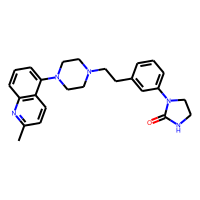

<span style='color:blue'>**5. Binding Site Detection:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Binding site definition method: **DETECTION**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Binding site detection method: **DOGSITESCORER**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Selection method for best binding site: **SORTING**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Selection criteria for best binding site: **['lig_cov', 'poc_cov']**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Name of selected binding site: **P_0_0**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Binding site coordinates - center: **[15.91, 32.33, 11.03]**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Binding site coordinates - size: **[24.84, 24.84, 24.84]**</span>

NGLWidget()

<span style='color:blue'>**6. Ligand Similarity Search:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Search engine: **PUBCHEM**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of fetched analogs with a similarity higher than **70%**: **30**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Dice-similarity range of fetched analogs: **0.14 - 0.39**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;CID of analog with the highest Dice-similarity: **60149**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of selected drug-like analogs: **20**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Range of drug-likeness score in selected analogs: **0.72 - 0.95**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;CID of analog with the highest drug-likeness score: **3510**</span>

/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:426: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use

<span style='color:blue'>**7. Docking Experiment:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Highest binding affinity of input ligand: **-10.3**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Binding affinity range of analogs: **-5.9 - -10.3**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of analog docking poses with higher affinity than ligand: **0**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of analogs with higher affinity than ligand: **0**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs with higher affinity than ligand: **set()**</span>

Docking modes
(CID - mode)


AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

<span style='color:blue'>**8. Protein-Ligand Interaction Analysis:** </span><span style='color:green'>Successful</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Highest number of total interactions in a docking pose of input ligand: **13**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Range of total number of interactions in docking poses of analogs: **4 - 15**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Correlation plot between binding affinity and number of interactions in docking poses of analogs:</span>

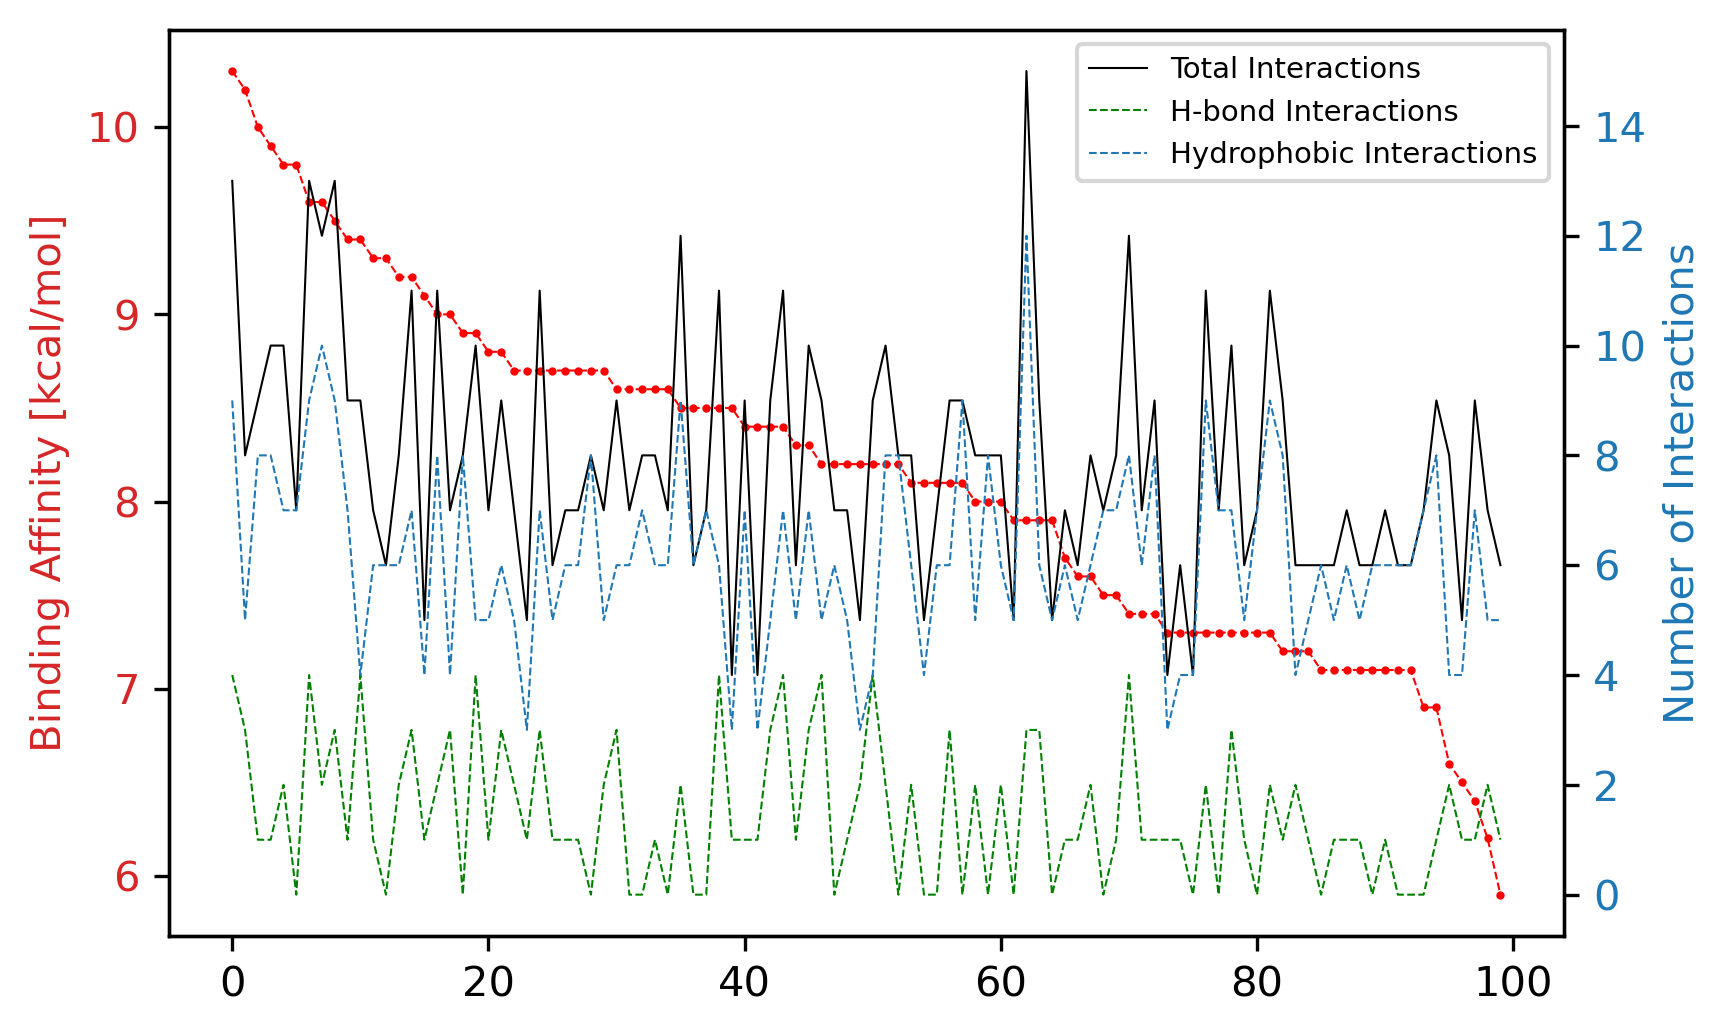

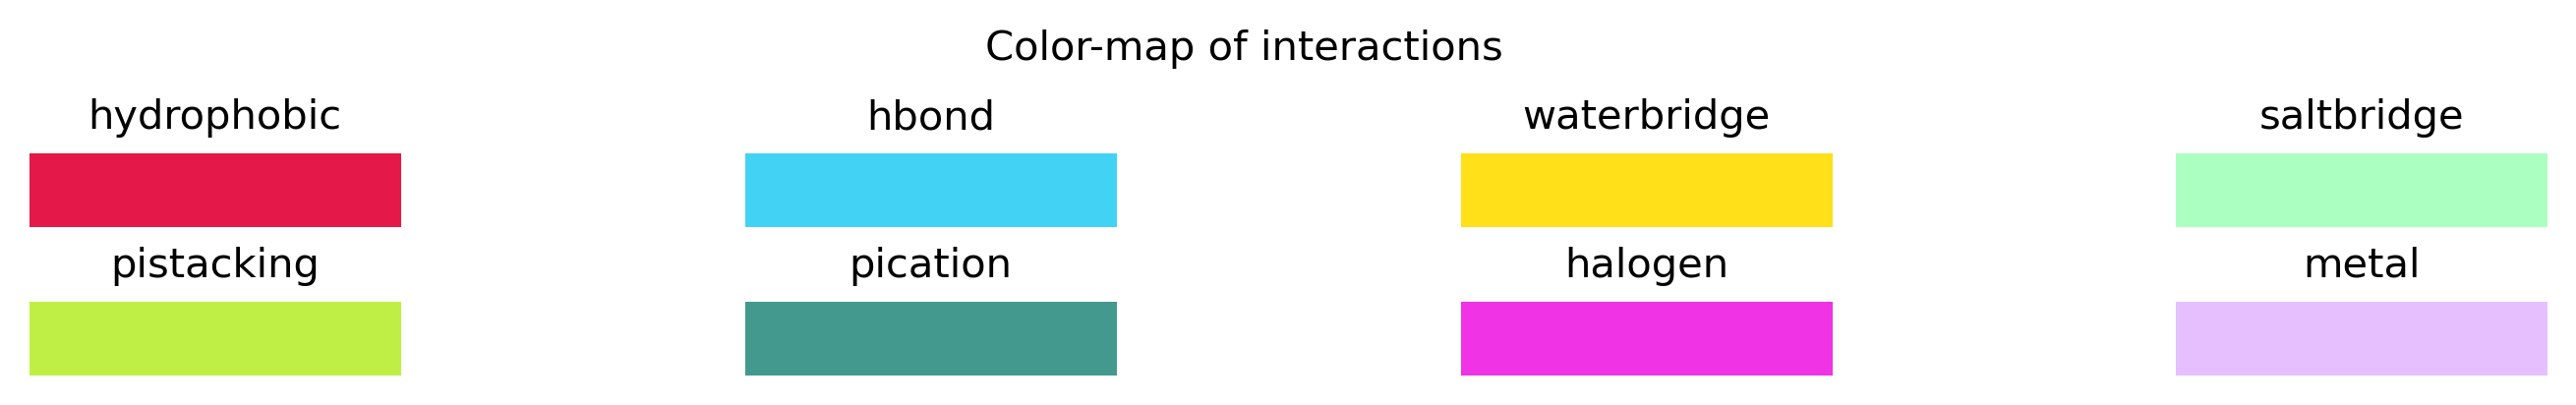

AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

<span style='color:blue'>**9. Selecting The Optimized Analog:** </span><span style='color:green'>Successful</span>

<span style='color:blue'>Number of docking poses with higher binding affinity than highest binding affinity of ligand: </span><span style='color:black'>0</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>[]</span>

<span style='color:blue'>Number of docking poses with higher number of total interactions than highest interacting pose of ligand: </span><span style='color:black'>1</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['2719']</span>

<span style='color:blue'>Number of docking poses with higher affinity and number of total interactions than best corresponding poses of ligand: </span><span style='color:black'>0</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>[]</span>

<span style='color:blue'>CIDs of analogs with higher binding affinity, number of total interactions and drug-likeness score than ligand: </span><span style='color:black'>[]</span>

<span style='color:blue'>**CIDs of selected analogs as final output:** </span><span style='color:black'>['60149']</span>

<span style='color:blue'>Comparison between the input ligand and optimized analog: </span><span style='color:black'></span>

,Input Ligand,Optimized Analog
Drug-Score,0.77,0.72
Highest Binding Affinity,-10.30,-10.30
Highest Number of Total Interactions,13.00,13.00


<span style='color:blue'>**Selected analogs as final output:**</span>

Value
Structure                                                                                                                                                                                                Property                                                                                                                                                                               
<img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAYqklEQVR4nO3deVyU1f4H8O8zDMwMsqMQKIh7ohaJ1+UF0k3klwuKy8VrLpkLLll... name                                                                                                                                                                         Sertindole
                                                                                                                                                                                                         iupac_name                                                                                       1-[2-[4-[5-chloro-1-(4-fluorophenyl)indol-3-yl]piperidin-1-yl]ethyl]imidazolidin-2-one
                                                                                                                                                                                                         smiles                                                                                                                       C1CN(CCC1C2=CN(C3=C2C=C(C=C3)Cl)C4=CC=C(C=C4)F)CCN5CCNC5=O
                                                                                                                                                                                                         cid                                                                                                                                                                               60149
                                                                                                                                                                                                         inchi                            InChI=1S/C24H26ClFN4O/c25-18-1-6-23-21(15-18)22(16-30(23)20-4-2-19(26)3-5-20)17-7-10-28(11-8-17)13-14-29-12-9-27-24(29)31/h1-6,15-17H,7-14H2,(H,27,31)
                                                                                                                                                                                                         inchikey                                                                                                                                                    GZKLJWGUPQBVJQ-UHFFFAOYSA-N
                                                                                                                                                                                                         mol_weight                                                                                                                                                                       440.95
                                                                                                                                                                                                         num_H_acceptors                                                                                                                                                                       3
                                                                                                                                                                                                         num_H_donors                                                                                                                                                                          1
                                                                                                                                                
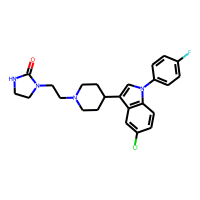

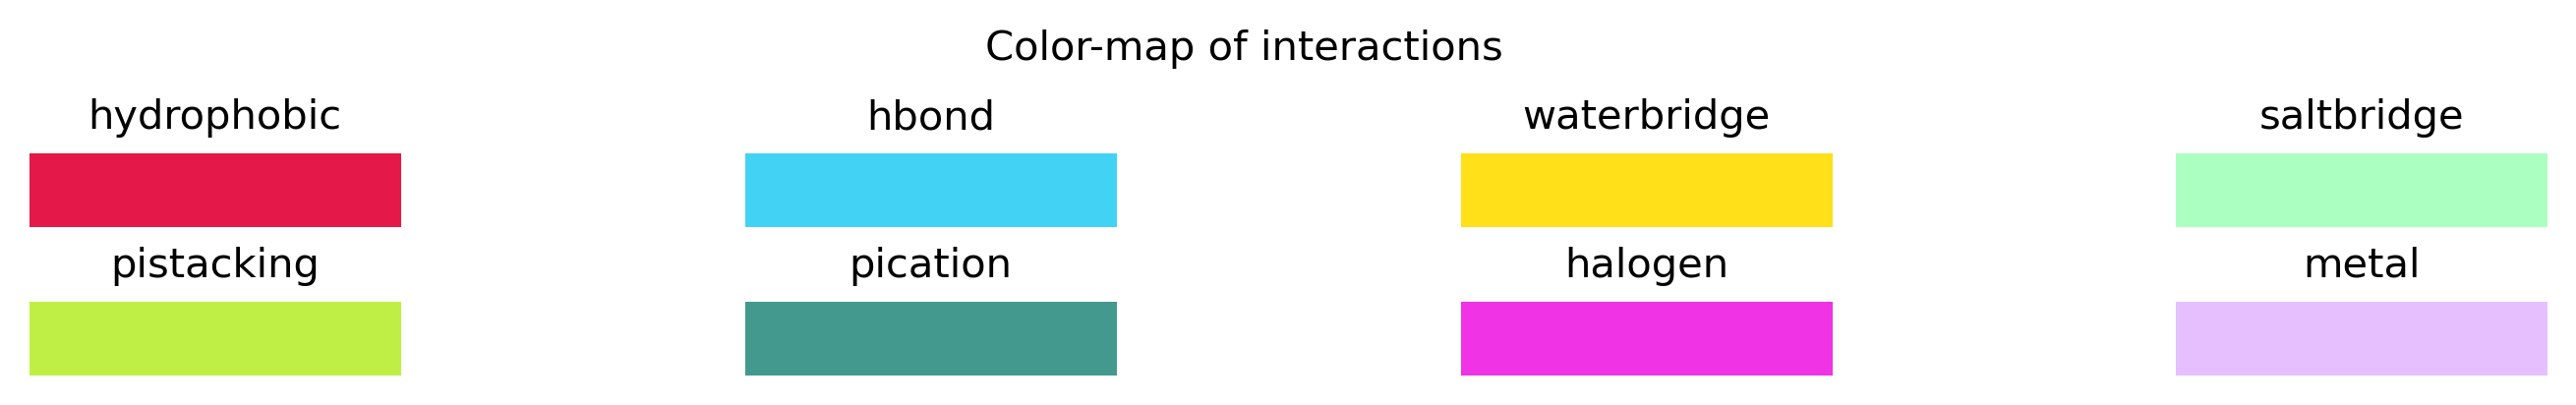

AppLayout(children=(Select(layout=Layout(flex='flex-grow', grid_area='left-sidebar', width='auto'), options=((…

<span style='color:blue'>**10. Pipeline Completed:** </span><span style='color:green'>Successful</span>

In [58]:
project2 = run_pipeline(
    "Project2_EGFR_CID11292933",
    input_data_filepath="data/PipelineInputData_Project2.csv",
    output_data_root_folder_path="data/Outputs",
)

<a id='discussion'></a>

# Discussion

In this talktorial, we successfully implemented a fully-automated virtual screening pipeline targeted at hit-expansion and lead-optimization phases of a drug discovery project using EGFR (PDB-code: 3W32) as the target protein and a promising inhibitor with the ChEMBL-ID CHEMBL328216. As the input, the pipeline accepted a single CSV data-file, specifying a protein structure, a ligand and several other settings regarding the different processes of the pipeline. It then performed all the necessary processes in order to derive at an optimized analog of the provided ligand in terms of binding affinity, number of protein-ligand interactions and drug-likeness. 

The process began with **binding-site definition** and binding-site detection using the *DoGSiteScorer* functionality of the *ProteinsPlus* webserver. The next step was a **ligand similarity-search** which is performed using the *PubChem* web-services via the provided API backend. Subsequently, the structural analogs detected via the similarity search were filtered based on their physiochemical properties in order to *select the most drug-like analogs*. These were assessed in a virtual screening process using the *Smina* program in order to *estimate their binding affinities and corresponding binding-poses*.

Using the *PLIP* package, these generated docking poses were *analyzed in terms of their specific non-covalent interactions with the target protein* and analogs displaying a specific set of desired interactions were selected in order to achieve *higher selectivities for the target protein*. After all required processes were carried out, the pipeline was used to *output one or several optimized analogs*, based on the criteria defined by the user in the input data, such as binding affinity, physiochemical and pharmacokinetic properties, and specific interactions with the protein structure.  

The code is specifically structured in such a way that it will be easy to digest, maintain, and expand. For each functionality of the pipeline, several helper classes were defined containing static methods that are required to develop a certain part of the pipeline. These *static methods can be easily adopted for other projects*. 

The pipeline was contained in a single class (***LeadOptimizationPipeline***) with sub-classes for every process, making for easier access to all parts of the data generated. Furthermore, at the end of the pipeline a function was provided ((***run_pipeline***) that put the whole program together and automatically ran a given project to completion, merely by providing an input specification file.

As the pipeline provides functionalities and options outside the scope of this talktorial, we have also provided a *Supplementary Information* section that showcases the possibilities of the pipeline in more detail. Furthermore, we have structured the code to be easily expandable, so it can be freely adopted and built upon for various situations and needs. The results of the pipeline are not, however, fully deterministic. Several calculations have randomized components during the course of their execution. Therefore, re-runing the pipeline under the same conditions will likely result in slightly different outputs. 

<p style="text-align:center;">
<img src="images/fig10.png" width="950" height=auto class="center"/>
</p>

*Figure 9.* Results of the pipeline's performance in the demonstrated examples; Starting with a ligand with a binding affinity of -8.7 kcal/mol, the pipeline was able to find an optimized ligand with an improved affinity of -10.3 kcal/mol. Subjecting this optimized ligand to the same process further improved the binding affinity, and a yet more suitable analog was found with a binding affinity of -10.9 kcal/mol. 
    
    

<a id='quiz'></a>

# Quiz

**Conceptual Questions:**
1. Describe the processes involved in the hit-to-lead and lead optimization phases of a drug design pipeline. How are these processes implemented in the virtual pipeline described in this talktorial?
2. Describe the important facets of binding-site definition in a general virtual screening pipeline. What options are available for binding-site definition and selection in this pipeline? 
3. What chemical differences for obtained analogs might explain their lower calculated similarity than the threshold specified in the input data?
5. Describe the criteria used in this pipeline to filter the initially obtained analogs for the docking calculation.
6. What explains why we do not carry out the docking calculation for all initially obtained analogs?
7. What were the preparation steps carried out to perform the docking calculations?
9. What did the interaction analysis data tell us about selecting an analog with higher selectivity for the target protein?
10. Why was it necessary to visualize the docked poses and their corresponding interactions? What criteria for ligand binding should we be looking for in these inspections?
11. What criteria were used for selecting the best optimized ligand at the end of the pipeline? 

**Exercises:**
1. In order to prevent the talktorial from being too lengthy, we only demonstrated a sub-set of the options and information that the pipeline offers. By again using the ***LeadOptimizationPipeline*** instance, execute the pipeline and explore its other options by looking up the attributes and methods of different classes comprising the pipeline.   
2. Try to implement a loop, where the final output of a pipeline is re-entered as the input for a new pipeline (i.e. try to optimize your initial input ligand through several runs, same as we did for the demonstration of the ***run_pipeline*** function). After how many cycles does the pipeline reach a plateau where results no longer improve?
3. Generate your own input CSV-files  each time choosing a different set of specifications, and compare the results. Can you find a set of specifications that perform considerably better than the others?

<a id='supp'></a>

# Supplementary Information
 
Here we will also demonstrate the functions of each helper-class used in the pipeline, to provide a better understanding of the inner workings of the code. Some cells use variables defined in an early cell. Therefore, in order for all cells to work you have to run them sequentially.

<a id='io_demo'></a>

## Demonstration of The ***IO*** Helper-Class

Using this class, the input CSV file can be easily imported via the ***create_dataframe_from_csv_input_file*** function, by specifying the corresponding filepath, the name of the columns to be used as indices for the dataframe, and the name of the other columns we want to keep:

In [59]:
example_input_df = IO.create_dataframe_from_csv_input_file(
    input_data_filepath="data/PipelineInputData_Project1.csv",
    list_of_index_column_names=[
        Consts.DataFrame.ColumnNames.SUBJECT.value,
        Consts.DataFrame.ColumnNames.PROPERTY.value,
    ],
    list_of_columns_to_keep=[Consts.DataFrame.ColumnNames.VALUE.value],
)

Note that for inputting the ***list_of_index_column_names*** and ***list_of_column_names_to_keep*** we didn't write the name of the columns (i.e. '***Subject***', '***Property***' and '***Value***') explicitly but used the respective constants stored in the ***Consts*** class. In this way, if the column names in the input file are changed in the future, they only need to be corrected in the ***Consts*** class and nowhere else in the code.

We can now view the imported data in its entirety:    

In [60]:
example_input_df

# NBVAL_CHECK_OUTPUT

Value
Subject                  Property                                                                                                     
Protein                  Input Type*                                                                                          pdb_code
                         Input Value*                                                                                             3W32
Ligand                   Input Type*                                                                                            smiles
                         Input Value*                                                                  Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N
Binding Site             Definition Method                                                                                   detection
                         Coordinates                                                                                               NaN
                         Ligand                                                                                                    NaN
                         Detection Method                                                                                dogsitescorer
                         Protein Chain-ID                                                                                            A
                         Protein Ligand-ID                                                                                         W32
                         Selection Method                                                                                      sorting
                         Selection Criteria                                                                           lig_cov, poc_cov
Ligand Similarity Search Search Engine                                                                                         pubchem
                         Minumum Similarity [%]                                                                                     70
                         Maximum Number of Results                                                                                  30
                         Maximum Number of Most Drug-Like Analogs to Continue With                                                  20
Docking                  Program                                                                                                 smina
                         Number of Docking Poses per Ligand                                                                          5
                         Exhaustiveness                                                                                             10
                         Random Seed                                                                                              1111
Interaction Analysis     Program                                                                                                  plip
Optimized Ligand         Number of Results                                                                                           1
                         Selection Method                                                                                      sorting
                         Selection Criteria                                         affinity, total_num_interactions, drug_score_total

Moreover, we can also extract all the data corresponding to a specific ***Subject***, using the ***copy_series_from_dataframe*** function and specifying the main dataframe and the name of the index-level and column that we want to extract. For example, to extract the binding-site specification data:

In [61]:
example_input_protein_data = IO.copy_series_from_dataframe(
    input_df=example_input_df,
    index_name=Consts.DataFrame.SubjectNames.BINDING_SITE.value,
    column_name=Consts.DataFrame.ColumnNames.VALUE.value,
)

# Displaying the extracted data:
example_input_protein_data

# NBVAL_CHECK_OUTPUT

Property
Definition Method            detection
Coordinates                        NaN
Ligand                             NaN
Detection Method         dogsitescorer
Protein Chain-ID                     A
Protein Ligand-ID                  W32
Selection Method               sorting
Selection Criteria    lig_cov, poc_cov
Name: Value, dtype: object

Later, for storing the output data we will also need the ***create_folder*** function, which can create a folder (and all its necessary parent folders) with a given name at a given path. The function then returns the full path of the created folder. We now create a folder named *Examples*, which we will use to store the files used in the demonstration sections.

In [62]:
example_output_path = IO.create_folder(folder_name="Examples", folder_path="data/Outputs")

# Displaying the full path of the generated folder:
example_output_path

# NBVAL_CHECK_OUTPUT

PosixPath('data/Outputs/Examples')

<a id='pdb_demo'></a>

## Demonstration of The ***PDB*** Helper-Class

We can use the ***fetch_and_save_pdb_file*** function to download a protein's PDB file using its PDB-code. The function takes in a full filepath, including the name of the file and returns the full filepath (including the .PDB extension).

In [63]:
example_downloaded_protein_filepath = PDB.fetch_and_save_pdb_file(
    pdb_code="3w32", output_filepath=example_output_path / "3W32"
)

example_downloaded_protein_filepath

# NBVAL_CHECK_OUTPUT

PosixPath('data/Outputs/Examples/3W32.pdb')


The PDB file is now downloaded on the disk. Now, the file content of the PDB file can be obtained as follows:    

In [64]:
example_pdb_file_content = PDB.read_pdb_file_content(
    input_type="pdb_filepath", input_value=example_downloaded_protein_filepath
)

# As the complete file is very long, here we only show the first 800 characters:
example_pdb_file_content[:800]

# NBVAL_CHECK_OUTPUT

'HEADER    TRANSFERASE/TRANSFERASE INHIBITOR       07-DEC-12   3W32              \nTITLE     EGFR KINASE DOMAIN COMPLEXED WITH COMPOUND 20A                        \nCOMPND    MOL_ID: 1;                                                            \nCOMPND   2 MOLECULE: EPIDERMAL GROWTH FACTOR RECEPTOR;                          \nCOMPND   3 CHAIN: A;                                                            \nCOMPND   4 FRAGMENT: KINASE DOMAIN, UNP RESIDUES 696-1022;                      \nCOMPND   5 SYNONYM: PROTO-ONCOGENE C-ERBB-1, RECEPTOR TYROSINE-PROTEIN KINASE   \nCOMPND   6 ERBB-1;                                                              \nCOMPND   7 EC: 2.7.10.1;                                                        \nCOMPND   8 ENGINEERED: YES                                             '

Note that, alternatively, we also could have set the ***input_type*** to 'pdb_code' and entered a valid PDB-code as the ***input_value*** to directly fetch and read the file contents of a protein PDB file from the PDB webserver. However, in that case, the PDB file itself would not have been saved on the disk.

This file content can the be used to extract some useful information from the PDB file:

In [65]:
PDB.extract_info_from_pdb_file_content(example_pdb_file_content)

# NBVAL_CHECK_OUTPUT

{'Structure Title': 'EGFR KINASE DOMAIN COMPLEXED WITH COMPOUND 20A',
 'Name': 'EPIDERMAL GROWTH FACTOR RECEPTOR',
 'Chains': ['A'],
 'Ligands': [['W32', 'A1101', 39], ['SO4', 'A1102', 5]]}

Or directly without storing the PDB file content in a variable (here using another PDB-code as example):

In [66]:
PDB.extract_info_from_pdb_file_content(
    pdb_file_text_content=PDB.read_pdb_file_content(input_type="pdb_code", input_value="5gty")
)

# NBVAL_CHECK_OUTPUT

{'Structure Title': 'CRYSTAL STRUCTURE OF EGFR 696-1022 T790M IN COMPLEX WITH LXX-6-26',
 'Name': 'EPIDERMAL GROWTH FACTOR RECEPTOR',
 'Chains': ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'C'],
 'Ligands': [['816', 'A1101', 36],
  ['816', 'B1101', 36],
  ['816', 'D1101', 36],
  ['816', 'E1101', 36],
  ['816', 'F1101', 36],
  ['816', 'G1101', 36],
  ['EDO', 'G1102', 4],
  ['816', 'H1101', 36],
  ['EDO', 'H1102', 4],
  ['EDO', 'H1103', 4],
  ['EDO', 'H1104', 4],
  ['816', 'C1101', 36]]}

The ***load_pdb_file_as_dataframe*** function can also be used but it does not contain all the information that the ***extract_info_from_pdb_file_content*** can extract. The function returns a dictionary where each value is a *Pandas DataFrame*:

In [67]:
example_pdb_dataframe = PDB.load_pdb_file_as_dataframe(example_pdb_file_content)
example_pdb_dataframe.keys()

# NBVAL_CHECK_OUTPUT

dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

For example, all the information regarding the atoms in the protein can be accessed via the ***ATOM*** key. This data was used in the pipeline, for example, to extract the range of residue numbers of the protein.

In [68]:
example_pdb_dataframe["ATOM"]

# NBVAL_CHECK_OUTPUT

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,GLN,,A,701,,,-0.023,33.326,-4.411,1.0,47.95,,,N,NaN,424
1,ATOM,2,,CA,,GLN,,A,701,,,-0.291,31.978,-3.835,1.0,50.95,,,C,NaN,426
2,ATOM,3,,C,,GLN,,A,701,,,0.946,31.062,-3.957,1.0,47.20,,,C,NaN,428
3,ATOM,4,,O,,GLN,,A,701,,,0.876,29.863,-3.659,1.0,47.25,,,O,NaN,430
4,ATOM,5,,CB,,GLN,,A,701,,,-1.501,31.341,-4.517,1.0,64.85,,,C,NaN,432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,ATOM,2541,,O,,LEU,,A,1017,,,-3.584,29.532,6.982,1.0,86.61,,,O,NaN,5504
2541,ATOM,2542,,CB,,LEU,,A,1017,,,-0.272,30.850,6.492,1.0,96.14,,,C,NaN,5506
2542,ATOM,2543,,CG,,LEU,,A,1017,,,0.143,29.601,5.697,1.0,116.26,,,C,NaN,5508
2543,ATOM,2544,,CD1,,LEU,,A,1017,,,-0.313,29.652,4.243,1.0,121.68,,,C,NaN,5510


<a id='pubchem_demo'></a>

## Demonstration of The ***PubChem*** Helper-Class

The ***convert_compound_identifier*** function can be used to get a specific compound's identifier by providing another identifier. 
    
For example, obtaining the SMILES of Aspirin by providing its name:

In [69]:
PubChem.convert_compound_identifier(
    input_id_type="name", input_id_value="aspirin", output_id_type="smiles"
)

# NBVAL_CHECK_OUTPUT

'CC(=O)OC1=CC=CC=C1C(=O)O'

Or retrieving its IUPAC name:

In [70]:
PubChem.convert_compound_identifier(
    input_id_type="name", input_id_value="aspirin", output_id_type="iupac_name"
)

# NBVAL_CHECK_OUTPUT

'2-acetyloxybenzoic acid'

Or retrieving its name using its SMILES:

In [71]:
PubChem.convert_compound_identifier(
    input_id_type="smiles",
    input_id_value="CC(=O)OC1=CC=CC=C1C(=O)O",
    output_id_type="name",
)

# NBVAL_CHECK_OUTPUT

'Aspirin'

Or retrieving its CID using its name:

In [72]:
PubChem.convert_compound_identifier(
    input_id_type="name", input_id_value="aspirin", output_id_type="cid"
)

# NBVAL_CHECK_OUTPUT

'2244'

Using the ***get_compound_record*** function, all available records on the molecule can be obtained in a dictionary with the following keys: '***id***', '***atoms***', '***bonds***', '***coords***', '***charge***', '***props***', '***count***'.

As an example, we access the '***props***' key, which contains the physiochemical properties of the compound:

In [73]:
# Only showing the first 2 entries, since the full list is too long:
PubChem.get_compound_record(input_id_type="name", input_id_value="aspirin")["props"][:2]

# NBVAL_CHECK_OUTPUT

[{'urn': {'label': 'Compound',
   'name': 'Canonicalized',
   'datatype': 5,
   'release': '2021.05.07'},
  'value': {'ival': 1}},
 {'urn': {'label': 'Compound Complexity',
   'datatype': 7,
   'implementation': 'E_COMPLEXITY',
   'version': '3.4.8.18',
   'software': 'Cactvs',
   'source': 'Xemistry GmbH',
   'release': '2021.05.07'},
  'value': {'fval': 212}}]

The ***get_description_from_smiles*** function provides a textual description of the compound. However, it is not available for every compound. If the parameter ***printout*** is set to False, the function will return a dictionary containing the descriptions, sources, and other information. By setting it to True, only the description part will be printed out. For example, for aspirin:

In [74]:
PubChem.get_description_from_smiles(smiles="CC(=O)OC1=CC=CC=C1C(=O)O", printout=True)

# NBVAL_CHECK_OUTPUT

Acetylsalicylic acid is a member of the class of benzoic acids that is salicylic acid in which the hydrogen that is attached to the phenolic hydroxy group has been replaced by an acetoxy group. A non-steroidal anti-inflammatory drug with cyclooxygenase inhibitor activity. It has a role as a non-steroidal anti-inflammatory drug, a non-narcotic analgesic, a platelet aggregation inhibitor, an antipyretic, a cyclooxygenase 2 inhibitor, a cyclooxygenase 1 inhibitor, a prostaglandin antagonist, a teratogenic agent, an anticoagulant, a plant activator, an EC 1.1.1.188 (prostaglandin-F synthase) inhibitor and a drug allergen. It is a member of benzoic acids, a member of salicylates and a member of phenyl acetates. It derives from a salicylic acid. It is a conjugate acid of an acetylsalicylate.

Aspirin is an orally administered non-steroidal antiinflammatory agent. Acetylsalicylic acid binds to and acetylates serine residues in cyclooxygenases, resulting in decreased synthesis of prostaglandin

<a id='rdkit_demo'></a>

## Demonstration of The ***RDKit*** Helper-Class

To use any other function in the ***RDKit*** class, we first have to generate an RDKit molecule object using the ***create_molecule_object*** function. This can accept different identifiers as input such as the SMILES. Here we again use Aspirin as an example:

In [75]:
example_mol_obj = RDKit.create_molecule_object(
    input_type="smiles", input_value="CC(=O)OC1=CC=CC=C1C(=O)O"
)

# NBVAL_CHECK_OUTPUT

The RDKit molecule objects can be called directly, which simply visualizes the molecule:

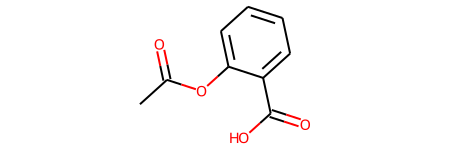

In [76]:
example_mol_obj

The ***calculate_druglikeness*** function can then be used to calculate several molecular properties and drug-likeness scores, which will be returned as a dictionary:

In [77]:
RDKit.calculate_druglikeness(mol_obj=example_mol_obj)

# NBVAL_CHECK_OUTPUT

{'mol_weight': 180.159,
 'num_H_acceptors': 3,
 'num_H_donors': 1,
 'logp': 1.31,
 'tpsa': 63.6,
 'num_rot_bonds': 2,
 'saturation': 0.11,
 'drug_score_qed': 0.55,
 'drug_score_lipinski': 1.0,
 'drug_score_custom': 0.72,
 'drug_score_total': 0.68}

The ***calculate_similarity_dice*** function is used to calculate the Dice similarity metric between two ligands using a 4096-bit Morgan fingerprints with a raidus of 2. Here, as an example we will input the same molecule twice which results in a similarity score of 1 (i.e. 100% similarity): 

In [78]:
RDKit.calculate_similarity_dice(mol_obj1=example_mol_obj, mol_obj2=example_mol_obj)

# NBVAL_CHECK_OUTPUT

1.0

Using the ***save_molecule_image_to_file*** function, an image file containing the ligand's structure can be saved at a given path as well:

In [79]:
RDKit.save_molecule_image_to_file(
    mol_obj=example_mol_obj, filepath=example_output_path / "aspirin"
)

In addition, we can use the ***save_3D_molecule_to_SDfile*** function which prepares the molecule for docking calcluations i.e. adds hydrogen atoms, creates 3D conformation and runs energy minimizations etc. It is then saved as an SDF file:

In [80]:
RDKit.save_3D_molecule_to_SDfile(mol_obj=example_mol_obj, filepath=example_output_path / "aspirin")

<a id='dogsitescorer_demo'></a>

## Demonstration of The ***DoGSiteScorer*** Class

If we want to detect the binding sites of a protein from a local PDB file, we should first upload the file to the *DogSiteScorer* webserver using the ***upload_pdb_file*** function. For this, we will use the PDB file we downloaded earlier:

In [81]:
example_dummy_pdb_id = DoGSiteScorer.upload_pdb_file(filepath=example_downloaded_protein_filepath)

example_dummy_pdb_id

'3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d'

The ***upload_pdb_file*** returns a dummy PDB-code for the uploaded structure which can be used in place of a valid PDB-code to submit a binding-site detection job. Notice that the ***submit_job*** function can also take in a chain-ID to limit the detection on that specific chain, and a ligand-ID to also calculate the coverage of each detected binding-site. However, the ligand-ID that *DoGSiteScorer* accepts has its own format and is not the same as the ligand-ID in the protein PDB file. 
    
Nevertheless, it follows the following format: (ligand-ID)\_(chain-ID)\_(ligand-residue-ID). When implementing the ***BindingSiteDetection*** class, we will circumvent this by automatically generating the *DogSiteScorer* ligand-ID from the normal ligand-ID so that the user does not have to manually look up and enter the ligand-ID in this specific format. This process should take *about one minute* to complete.

In [82]:
example_binding_site_data = DoGSiteScorer.submit_job(
    pdb_id=example_dummy_pdb_id, ligand_id="W32_A_1101", chain_id="A"
)

example_binding_site_data

# NBVAL_CHECK_OUTPUT

,lig_cov,poc_cov,lig_name,volume,enclosure,surface,depth,surf/vol,lid/hull,ellVol,ell c/a,ell b/a,siteAtms,accept,donor,hydrophobic_interactions,hydrophobicity,metal,Cs,Ns,Os,Ss,Xs,negAA,posAA,polarAA,apolarAA,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL,simpleScore,drugScore,pdb_file_url,ccp4_file_url
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P_0,85.48,31.22,W32_A_1101,1422.66,0.10,1673.75,19.26,1.176493,-,-,0.13,0.67,288,86,40,71,0.36,0,198,45,41,4,0,0.10,0.13,0.24,0.53,4,5,2,5,2,2,1,5,0,3,12,3,2,3,3,1,2,1,1,5,0.63,0.810023,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_res.pdb,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_gpsAll.ccp4.gz
P_0_0,85.48,73.90,W32_A_1101,599.23,0.06,540.06,17.51,0.901257,-,-,0.14,0.22,131,35,13,25,0.34,0,95,16,17,3,0,0.03,0.10,0.28,0.59,1,2,1,1,2,1,0,2,0,2,7,1,2,2,1,0,2,0,0,2,0.59,0.620201,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_0_res.pdb,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_0_gpsAll.ccp4.gz
P_0_1,3.23,0.44,W32_A_1101,201.73,0.08,381.07,11.36,1.889010,-,-,0.17,0.25,51,17,9,10,0.28,0,36,6,7,2,0,0.08,0.17,0.25,0.50,1,1,0,1,1,1,0,0,0,0,3,1,1,0,0,0,1,0,0,1,0.17,0.174816,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_1_res.pdb,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_1_gpsAll.ccp4.gz
P_0_2,0.00,0.00,W32_A_1101,185.60,0.17,282.00,9.35,1.519397,-,-,0.45,0.55,48,17,8,12,0.32,0,31,8,8,1,0,0.17,0.25,0.08,0.50,0,2,0,1,0,0,1,1,0,0,2,1,1,1,0,0,0,0,0,2,0.13,0.195695,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_2_res.pdb,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_2_gpsAll.ccp4.gz
P_0_3,6.45,0.29,W32_A_1101,175.30,0.15,297.42,9.29,1.696634,-,-,0.23,0.37,48,16,8,14,0.37,0,32,8,8,0,0,0.14,0.14,0.36,0.36,1,1,1,2,0,0,0,3,0,0,1,1,0,1,1,1,0,0,0,1,0.13,0.168845,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_3_res.pdb,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_3_gpsAll.ccp4.gz
P_0_4,0.00,0.00,W32_A_1101,170.37,0.08,390.10,11.99,2.289722,-,-,0.16,0.20,47,14,7,17,0.45,0,34,7,6,0,0,0.00,0.18,0.18,0.64,2,2,0,0,0,1,0,0,0,1,3,0,0,0,0,0,0,1,1,0,0.15,0.223742,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_4_res.pdb,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_4_gpsAll.ccp4.gz
P_0_5,0.00,0.00,W32_A_1101,90.43,0.24,177.50,6.24,1.962844,-,-,0.70,0.89,26,8,6,5,0.26,0,16,6,4,0,0,0.12,0.25,0.25,0.38,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0.00,0.165232,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_5_res.pdb,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_0_5_gpsAll.ccp4.gz
P_1,0.00,0.00,W32_A_1101,708.99,0.13,1030.19,14.32,1.453039,-,-,0.14,0.59,140,44,13,34,0.37,0,98,17,25,0,0,0.14,0.11,0.36,0.39,3,1,1,0,0,0,4,4,0,1,4,2,0,1,1,2,2,0,1,1,0.46,0.755915,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_1_res.pdb,https://proteins.plus/results/dogsite/aHrKy6R8MmL1mApufbziLW9b/3w32pdb154c8039-90bc-4271-b2ff-a1a767c5773d_P_1_gpsAll.ccp4.gz
P_1_0,0.00,0.00,W32_A_1101,496.90,0.11,739.17,12.72,1.487563,-,-,0.14,0.18,103,34,8,22,0.34,0,74,12,17,0,0,0.18,0.09,0.32,0.41,2,1,1,0,0,0,4,1,0,1,4,1,0,0,1,2,2,0,1,1,0.49,0.465489,https

Alternatively, we can also use a valid PDB-code to directly submit a binding-site detection job: 

In [83]:
DoGSiteScorer.submit_job(
    pdb_id=project1.Protein.pdb_code,
    ligand_id="W32_A_1101",
    chain_id=project1.Protein.chains[0],
)

# NBVAL_CHECK_OUTPUT

,lig_cov,poc_cov,lig_name,volume,enclosure,surface,depth,surf/vol,lid/hull,ellVol,ell c/a,ell b/a,siteAtms,accept,donor,hydrophobic_interactions,hydrophobicity,metal,Cs,Ns,Os,Ss,Xs,negAA,posAA,polarAA,apolarAA,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL,simpleScore,drugScore,pdb_file_url,ccp4_file_url
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P_0,85.48,31.22,W32_A_1101,1422.66,0.10,1673.75,19.26,1.176493,-,-,0.13,0.67,288,86,40,71,0.36,0,198,45,41,4,0,0.10,0.13,0.24,0.53,4,5,2,5,2,2,1,5,0,3,12,3,2,3,3,1,2,1,1,5,0.63,0.810023,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_gpsAll.ccp4.gz
P_0_0,85.48,73.90,W32_A_1101,599.23,0.06,540.06,17.51,0.901257,-,-,0.14,0.22,131,35,13,25,0.34,0,95,16,17,3,0,0.03,0.10,0.28,0.59,1,2,1,1,2,1,0,2,0,2,7,1,2,2,1,0,2,0,0,2,0.59,0.620201,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_0_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_0_gpsAll.ccp4.gz
P_0_1,3.23,0.44,W32_A_1101,201.73,0.08,381.07,11.36,1.889010,-,-,0.17,0.25,51,17,9,10,0.28,0,36,6,7,2,0,0.08,0.17,0.25,0.50,1,1,0,1,1,1,0,0,0,0,3,1,1,0,0,0,1,0,0,1,0.17,0.174816,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_1_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_1_gpsAll.ccp4.gz
P_0_2,0.00,0.00,W32_A_1101,185.60,0.17,282.00,9.35,1.519397,-,-,0.45,0.55,48,17,8,12,0.32,0,31,8,8,1,0,0.17,0.25,0.08,0.50,0,2,0,1,0,0,1,1,0,0,2,1,1,1,0,0,0,0,0,2,0.13,0.195695,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_2_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_2_gpsAll.ccp4.gz
P_0_3,6.45,0.29,W32_A_1101,175.30,0.15,297.42,9.29,1.696634,-,-,0.23,0.37,48,16,8,14,0.37,0,32,8,8,0,0,0.14,0.14,0.36,0.36,1,1,1,2,0,0,0,3,0,0,1,1,0,1,1,1,0,0,0,1,0.13,0.168845,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_3_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_3_gpsAll.ccp4.gz
P_0_4,0.00,0.00,W32_A_1101,170.37,0.08,390.10,11.99,2.289722,-,-,0.16,0.20,47,14,7,17,0.45,0,34,7,6,0,0,0.00,0.18,0.18,0.64,2,2,0,0,0,1,0,0,0,1,3,0,0,0,0,0,0,1,1,0,0.15,0.223742,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_4_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_4_gpsAll.ccp4.gz
P_0_5,0.00,0.00,W32_A_1101,90.43,0.24,177.50,6.24,1.962844,-,-,0.70,0.89,26,8,6,5,0.26,0,16,6,4,0,0,0.12,0.25,0.25,0.38,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0.00,0.165232,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_5_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_0_5_gpsAll.ccp4.gz
P_1,0.00,0.00,W32_A_1101,708.99,0.13,1030.19,14.32,1.453039,-,-,0.14,0.59,140,44,13,34,0.37,0,98,17,25,0,0,0.14,0.11,0.36,0.39,3,1,1,0,0,0,4,4,0,1,4,2,0,1,1,2,2,0,1,1,0.46,0.755915,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_1_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_1_gpsAll.ccp4.gz
P_1_0,0.00,0.00,W32_A_1101,496.90,0.11,739.17,12.72,1.487563,-,-,0.14,0.18,103,34,8,22,0.34,0,74,12,17,0,0,0.18,0.09,0.32,0.41,2,1,1,0,0,0,4,1,0,1,4,1,0,0,1,2,2,0,1,1,0.49,0.465489,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_1_0_res.pdb,https://proteins.plus/results/dogsite/SrKhwW3ofBbJqVQSCbLLkoeU/3w32_P_1_0_gpsAll.ccp4.gz


The ***submit_job*** function returns a DataFrame containing all the detected binding-sites and their respective properties. It also contains the URLs of the PDB and CCP4 files for each of the detected binding-sites, which can be used to download the files later. Among the calculated properties, the most important are ***drugScore***, ***simpleScore***, ***volume***, as well as ***lig_cov*** and ***poc_cov*** for when a ligand-ID is also inputted. The list of all properties can be accessed by retrieving the column names of the DataFrame: 

In [84]:
example_binding_site_data.columns

# NBVAL_CHECK_OUTPUT

Index(['lig_cov', 'poc_cov', 'lig_name', 'volume', 'enclosure', 'surface',
       'depth', 'surf/vol', 'lid/hull', 'ellVol', 'ell c/a', 'ell b/a',
       'siteAtms', 'accept', 'donor', 'hydrophobic_interactions',
       'hydrophobicity', 'metal', 'Cs', 'Ns', 'Os', 'Ss', 'Xs', 'negAA',
       'posAA', 'polarAA', 'apolarAA', 'ALA', 'ARG', 'ASN', 'ASP', 'CYS',
       'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO',
       'SER', 'THR', 'TRP', 'TYR', 'VAL', 'simpleScore', 'drugScore',
       'pdb_file_url', 'ccp4_file_url'],
      dtype='object')

The ***simpleScore*** is a simple druggability score, based on a linear combination of the three descriptors describing volume, hydrophobicity and enclosure. In addition, a subset of meaningful descriptors is incorporated in a support vector machine (libsvm) to predict a druggability score called ***drugScore***, which has a value between 0 and 1. The higher the score the more druggable the binding-site is estimated to be. ***lig_cov*** gives the percentage of the ligand volume that is covered by the binding-site, and ***poc_cov*** gives the percentage of the binding-site volume that is covered by the ligand.

Depending on the specifics of the project, these values can be used to select the most-suitable detected binding-site. Here, we have implemented two possibilities for this selection process in the ***select_best_pocket*** function. The first option is to provide a list of properties in order of importance, based on which the binding-site with the highest or lowest value is to be chosen. The function then returns the name of the selected binding-site. The list of properties should be inputted as a list:

In [85]:
example_best_pocket_name = DoGSiteScorer.select_best_pocket(
    binding_site_df=example_binding_site_data,
    selection_method="sorting",
    selection_criteria=["lig_cov", "poc_cov"],
    ascending=False,
)

example_best_pocket_name

# NBVAL_CHECK_OUTPUT

'P_0_0'

For example, the above ***selection_criteria*** sorts the binding-sites by their ***lig_cov*** values and if there are two or more binding-sites with the same ***lig_cov*** value, it then sorts them by their ***poc_cov*** values.

Another possibility for selecting a binding site is to provide any valid python expression that generates a list-like object with the same length as the number of detected binding-site. This python expression is inputted as string, so the user can directly input a python expression in the input CSV file and it will be evaluated during the runtime.

For example, using this method we can perform any calculation on the properties in the binding-site DataFrame. Note that for referring to the binding-site dataframe, *'df'* should be used:

In [86]:
DoGSiteScorer.select_best_pocket(
    binding_site_df=example_binding_site_data,
    selection_method="function",
    selection_criteria="((df['lig_cov'] + df['poc_cov']) / 2) * ((df['drugScore'] + df['simpleScore']) / 2) / df['volume']",
    ascending=False,
)

# NBVAL_CHECK_OUTPUT

'P_0_0'

For example, the above ***selection_criteria*** is a function that calculates the average of ***lig_cov*** and ***poc_cov***, as well as the average of ***drugScore*** and ***simpleScore***, multiplies the two together and then divides the result by the ***volume***. The binding-site that has the highest value is then chosen. If we want to have the lowest value, we can set the ***ascending*** parameter to False. Note that the dataframe should always be referred to as *'df'*. Another example is:

In [87]:
DoGSiteScorer.select_best_pocket(
    binding_site_df=example_binding_site_data,
    selection_method="function",
    selection_criteria="df[['drugScore', 'simpleScore']].min(axis=1) * df[['poc_cov', 'lig_cov']].max(axis=1)",
    ascending=False,
)

# NBVAL_CHECK_OUTPUT

'P_0'

The above example calculates the minimum value between ***drugScore*** and ***simpleScore***, and multiplies the results with the maximum value between the***poc_cov*** and ***lig_cov***. 
    
We now want to calculate the coordinates of the selected binding-site, so that we can use it in the docking process. For this, we first need to download the PDB files of the detected binding-sites, using the ***save_binding_sites_to_file*** function:  

In [88]:
DoGSiteScorer.save_binding_sites_to_file(
    binding_site_df=example_binding_site_data, output_path=example_output_path
)

Having downloaded the necessary binding-site files, we can now calculate the coordinates of the selected binding-site:

In [89]:
DoGSiteScorer.calculate_pocket_coordinates_from_pocket_pdb_file(
    filepath=example_output_path / example_best_pocket_name
)

# NBVAL_CHECK_OUTPUT

{'center': [15.91, 32.33, 11.03], 'size': [24.84, 24.84, 24.84]}